# Deep Learning for Life Sciences - Team Assignment

Recent progress in spatial tissue imaging has resulted in the emergence of many new technologies that enable measurements of multiple biological markers at the subcellular level. One such technology is IMC (Imaging Mass Cytometry), developed at [BodemillerLab](https://www.bodenmillerlab.com/#/) in Zurich. [Here](https://www.nature.com/articles/s41586-019-1876-x), you can read how this technology has enabled massive progress in understanding the mechanisms behind breast cancer.

One application of this technology is analyzing the data from the [Immucan](https://immucan.eu/) consortium, where data from patients with different cancer types is analyzed using various techniques, including IMC.

# Task
[Cell typing](https://en.wikipedia.org/wiki/Cell_type), a fundamental step in cellular data analysis, involves assigning each cell to a specific type. In this assignment, you will perform cell typing based on the manually expert-annotated data. At the high level, your task will be to:

1. **Perform EDA (exploratory data analysis) (3pts)** - in the form of an approx. 5-minute presentation - you will present your insight about the data you were provided with.
2. **Apply a baseline technique for the classification (3pts).** Each team should try at least three popular techniques on the provided data. Among these three popular techniques, there should be:
    - one linear baseline (e.g., multiclass logistic regression, SVM, etc.),
    - one gradient boosting technique (e.g., XGBoost, CatBoost, etc.),
    - one additional technique of your choice.
3. **Apply one of the state-of-the-art methods pre-selected by Immucan researchers (5pts)** (see description below).

## State-of-the-art methods
We will assign each team with one of the pre-selected state-of-the-art methods:
- [cellSighter](https://www.nature.com/articles/s41467-023-40066-7),
- [Stellar](https://www.nature.com/articles/s41592-022-01651-8), (additional [biorxiv](https://www.biorxiv.org/content/10.1101/2021.11.24.469947v3) URL),
- [Pixie](https://www.nature.com/articles/s41467-023-40068-5),
- [Astir](https://astir.readthedocs.io/en/latest/index.html),
- [Celesta](https://www.nature.com/articles/s41592-022-01498-z) (additional [biorxiv](https://www.biorxiv.org/content/10.1101/2022.02.02.478888v1) URL),
- [CSPOT](https://www.biorxiv.org/content/10.1101/2023.11.15.567196v1),
- [STARLING](https://www.biorxiv.org/content/10.1101/2024.02.29.582827v2).

We will assign a method to a team based on the random choice driven by your preferences. The voting procedure will be as follows: each team must set their preferences in this [sheet](https://docs.google.com/spreadsheets/d/1wtdwD7O49GHmPmPPFYF9WcjlDG0VRwf6MOWh3aV0iaw/edit?usp=sharing) (where you should also write your team name and members). To each method, your team can assign from 0 to 5 points (the more points, the higher the chance of getting a method). Each team has 10 points in total. In case when there are more teams than selected methods, the most popular method will be assigned to more than one team. Please e-mail marcin.mozejko@student.uw.edu.pl once you filled the spreadsheet for your team.

# Data
We will provide you with [training data](https://drive.google.com/file/d/1-0YOHE1VoTRWqfBJLHQorGcHmkhCYvqW/view?usp=sharing) and a hold-out test set. The training data will be provided from the start of the assignment, and the test data will be provided on May 9th during the grading of your task. Both datasets are in the same format. In the code below the task description you will be provided with a brief data overview.

# Grading
1. **EDA** - A maximal number of points (3) will be assigned when a team will present:
    - A general data overview,
    - Correlation patterns between markers and cell types (at least 3) - with a biological explanation,
    - Three biologically driven patterns of intertype marker differentiation (e.g., Tumor PDL1+ vs Tumor PDL1-, Mac CD206+ vs Mac CD206-, etc.),
2. **Baseline techniques**: For proper implementation of each of the three methods, we will award 1 point,
If possible, a method should enable random seed/state-based reproducibility,
3. **State-of-the-art methods**: A proper application of the existing method will be awarded with 5 pts.

## Metrics

Please report:
- overall Accuracy, and `macro-f1`,
- per cell type `average_precision` and `AUC`.

## Additional Compute

In case you need an additional compute - please contant the author of the task: marcin.mozejko@student.uw.edu.pl

## Deliverables
Each team should provide a git repository with a code and analysis. In each of the repositories, there should be:
1. Instructions on how to set up the environment (e.g., virtual env, docker, etc.) to run your method (1pt),
2. Instructions on how to pre-train baselines and state-of-the-art methods on new data (in the same format as the one provided with the task). For each method, the output should be a table where each cell will be assigned cell-type probabilities (if available) and a final cell-type prediction (2 pts).
3. Instructions on how to apply your pre-trained baseline methods and assigned state-of-the-art methods to new data (in the same format as the one provided with the task). For each method, the output should be a table where each cell will be assigned cell-type probabilities (if available) and a final cell-type prediction (1pts).

## Additional points:
- A team with the highest scoring baseline method on the test data will be awarded three activity points,
- Any creative modification of the state-of-the-art method will be awarded with up to 3 activity points,
- Any interesting biological insight gained from EDA or baseline/method training will be awarded with up to 3 activity points,
- Any uncertainty-based analysis of any model result will be awarded with one activity point.

## Project Timeline
- **April 11th** - release of the task, and the state-of-the-art method voting spreadsheet,
- **April 15th, 23:59** - end of the state-of-the-art method voting,
- **April 18th** - assignment of the state-of-the-art methods to the teams,
- **May 9th** - final presentation, release of the test data.

# Contact

In case of any questions - contact **Marcin Możejko** (marcin.mozejko@student.uw.edu.pl) - the author of the task.

# Data Overview

Let us start with appropriate imports:

In [2]:
!pip install anndata
!pip install delayedarray
!pip install pyometiff

Now - download the training data from [here](https://drive.google.com/file/d/1-0YOHE1VoTRWqfBJLHQorGcHmkhCYvqW/view?usp=sharing).

Unzip the archive and set `PATH_TO_FOLDER` to a path where you unzipped the data:

In [3]:
import os

# from google.colab import drive

import anndata


# drive.mount('/content/drive') # use if you plan to use colab.
PATH_TO_FOLDER = './'
TRAIN_DATA_PATH = 'train'
ORIGINAL_IMAGE_DATA_SUBDIR = 'images_masks'
ORIGINAL_MASKS_SUBDIR = 'masks'
ORIGINAL_IMAGES_SUBDIR = 'img'

if PATH_TO_FOLDER is None:
    raise ValueError('Please set PATH_TO_FOLDER to a path with unzipped training data.')

ANNDATA_PATH = 'cell_data.h5ad'
TRAIN_ANNDATA_PATH = os.path.join(TRAIN_DATA_PATH, ANNDATA_PATH)
TRAIN_IMAGE_DATA_DIR = os.path.join(TRAIN_DATA_PATH, ORIGINAL_IMAGE_DATA_SUBDIR)
TRAIN_IMAGE_DATA_IMAGES = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_IMAGES_SUBDIR)
TRAIN_IMAGE_DATA_MASKS = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_MASKS_SUBDIR)

## Data overview

A provided training data consist of two entities:
- a tabular data (stored in a `cell_data.h5ad` file),
- image data - stored in `images_masks` directory.

Let us start with having a look at the tabular data:

In [4]:
train_anndata = anndata.read_h5ad(TRAIN_ANNDATA_PATH)
train_anndata.obs.head()

,image,sample_id,ObjectNumber,Pos_X,Pos_Y,area,major_axis_length,minor_axis_length,eccentricity,width_px,...,flag_tumor,PD1_pos,Ki67_pos,cleavedPARP_pos,GrzB_pos,tumor_patches,distToCells,CD20_patches,Batch,cell_labels
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,1.0,300.846154,0.692308,13.0,6.094800,2.780135,0.889904,600.0,...,0,0,0,0,0,1,8.773580,,Batch20191023,MacCD163
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_3,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,3.0,26.982143,0.928571,56.0,21.520654,3.368407,0.987675,600.0,...,0,0,0,0,0,0,72.247393,,Batch20191023,Mural
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_5,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,5.0,309.083333,0.750000,12.0,5.294329,2.862220,0.841267,600.0,...,0,0,0,0,0,1,16.982199,,Batch20191023,DC
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_7,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,7.0,431.916667,0.750000,12.0,5.294329,2.862220,0.841267,600.0,...,0,0,0,0,0,1,-8.314676,,Batch20191023,Tumor
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_8,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,8.0,116.931034,1.206897,29.0,9.216670,4.112503,0.894932,600.0,...,0,0,0,0,0,1,-15.358007,,Batch20191023,Tumor


In [35]:
test = train_anndata.obs[train_anndata.obs["image"] == "IMMUcan_Batch20220908_S-220729-00002_002.tiff"]
test["cell_labels"].value_counts()

cell_labels
Tumor         1588
Mural          203
plasma          70
CD8             52
HLADR           40
CD4             26
DC              17
Treg            15
MacCD163         6
B                1
BnT              1
Neutrophil       1
NK               0
pDC              0
Name: count, dtype: int64

In [45]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
output = pd.read_csv('CELESTA/thresholds_1_final_cell_type_assignment.csv')[["X", "Y", "Final cell type"]]
print(output['Final cell type'].value_counts())
test_chosen = test[["Pos_X", "Pos_Y", "cell_labels"]]
test_chosen["output"] = output["Final cell type"].tolist()
test_chosen['res'] = test_chosen['output'] == test_chosen['cell_labels']
test_chosen.head()
# print(test_chosen.res.mean())
print(f"{f1_score(test_chosen['cell_labels'], test_chosen['output'], average='macro'):.4f}", "f1 macro")
print(f"{f1_score(test_chosen['cell_labels'], test_chosen['output'], average='weighted'):.4f}", "f1 weighted")
print(f"acc: {accuracy_score(test_chosen['cell_labels'], test_chosen['output']):.4f} ")
test_chosen[['output', 'cell_labels']].value_counts()

Final cell type
Tumor         1551
Mural          157
HLADR           87
plasma          75
CD4             51
CD8             44
MacCD163        21
Treg            17
pDC             15
Neutrophil       1
B                1
Name: count, dtype: int64
0.6152 f1 macro
0.9160 f1 weighted
acc: 0.9094 


/tmp/ipykernel_7949/676400170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chosen["output"] = output["Final cell type"].tolist()
/tmp/ipykernel_7949/676400170.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chosen['res'] = test_chosen['output'] == test_chosen['cell_labels']


output      cell_labels
Tumor       Tumor          1504
Mural       Mural           147
plasma      plasma           63
CD8         CD8              43
Tumor       Mural            43
HLADR       HLADR            36
            Tumor            27
CD4         Tumor            24
            CD4              22
pDC         Tumor            14
Treg        Treg             14
HLADR       DC               13
plasma      Tumor             9
HLADR       Mural             8
MacCD163    Tumor             6
            MacCD163          6
Mural       CD8               5
MacCD163    DC                4
Tumor       plasma            3
Treg        Tumor             3
MacCD163    HLADR             2
plasma      Mural             2
Mural       HLADR             2
CD4         Mural             2
Mural       plasma            2
MacCD163    CD4               1
CD8         Tumor             1
CD4         CD8               1
plasma      CD4               1
pDC         plasma            1
CD4         Treg

Train `anndata` `obs` dataframe stores the information about cells. Each row in this table represent an information about a single cell. It has the following columns that are interesting for your analysis:
- `image` - name of the image file from which a cell was obtained,
- `sample_id` - name of the patient sample from which a given image was obtained,
- `ObjectNumber` - a cell number within a given image (note that it starts from 1),
- `Pos_X`, `Pos_Y` - a spatial position of the cell one the image,
- `area`, `major_axis_length`, `minor_axis_length`, `eccentricity`, `width_px`, `height_px` - shape-derived features of a cell,
- `Batch` - a batch in which a sample was used,
- `cell_labels` - your target cell type annotations. **THIS IS WHAT YOUR MODELS AIM TO PREDICT!**

`train_anndata.var` stores the information about the marker names. Please use the `marker` column in your analysis:

In [5]:
train_anndata.var['marker']

0                   MPO
1             HistoneH3
2                   SMA
3                  CD16
4                  CD38
5                 HLADR
6                  CD27
7                  CD15
8                CD45RA
9                 CD163
10                  B2M
11                 CD20
12                 CD68
13                 Ido1
14                  CD3
15                 LAG3
16                CD11c
17                  PD1
18               PDGFRb
19                  CD7
20                 GrzB
21                 PDL1
22                 TCF7
23               CD45RO
24                FOXP3
25                 ICOS
26                 CD8a
27    CarbonicAnhydrase
28                 CD33
29                 Ki67
30                VISTA
31                 CD40
32                  CD4
33                 CD14
34                 Ecad
35                CD303
36                CD206
37          cleavedPARP
38                 DNA1
39                 DNA2
Name: marker, dtype: object

`train_anndata.layers['exprs']` with shape `(train_anndata.obs.shape[0], train_anndata.var.shape[0])` stores the matrix with marker expressions for each cell:

In [5]:
train_anndata.layers['exprs']

array([[0.        , 1.81998789, 0.50264976, ..., 0.42427316, 4.76113044,
        5.30135121],
       [0.13592021, 2.39308671, 1.1369607 , ..., 0.1186204 , 5.02924127,
        5.53076447],
       [0.16590455, 2.24491655, 1.39633367, ..., 0.01514088, 4.41838981,
        4.81592274],
       ...,
       [0.11088375, 3.52028872, 0.31083376, ..., 0.10251545, 4.30306951,
        4.82609754],
       [0.15094134, 4.2149584 , 2.65164581, ..., 0.08397474, 4.8224562 ,
        5.36166154],
       [0.49059059, 5.8223478 , 1.61541043, ..., 0.22942113, 4.44821169,
        5.01081325]])

# Image Data

We will now show you how to connect information from the tabular data with the image information. Let us have a look at the third cell in the table:

In [6]:
train_anndata.obs.iloc[2]

image                   IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...
sample_id               IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...
ObjectNumber                                                          5.0
Pos_X                                                          309.083333
Pos_Y                                                                0.75
area                                                                 12.0
major_axis_length                                                5.294329
minor_axis_length                                                 2.86222
eccentricity                                                     0.841267
width_px                                                            600.0
height_px                                                           600.0
acquisition_id                                                        2.0
SlideId                                   10032145-THOR-VAR-TIS-01-IMC-01
Study                                 

We can see that the image name assigned to this cell is `IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff`. Additionally - please note that the `ObjectNumber` is equal to 5. Now there are two type of image data:

- marker data (stored in `images_masks/img` subdir),
- mask data (stored in `images_masks/masks` subdir).

Let us have a look at the image and mask from which a given cell was taken:

In [7]:
import pyometiff
import matplotlib.pyplot as plt


image_name = train_anndata.obs.iloc[2]['image']
image_path = os.path.join(TRAIN_IMAGE_DATA_IMAGES, image_name)
mask_path = os.path.join(TRAIN_IMAGE_DATA_MASKS, image_name)

In [8]:
image_reader = pyometiff.OMETIFFReader(fpath=image_path)
mask_reader = pyometiff.OMETIFFReader(fpath=mask_path)


image_array, _, _ = image_reader.read()
mask_array, _, _ = mask_reader.read()

In `mask_array` each pixel stores the information about which `ObjectNumber` cell a particular pixel belongs to:

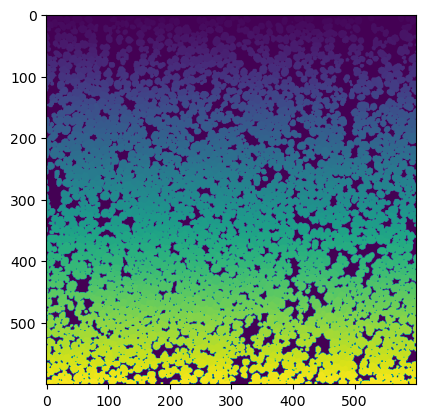

In [9]:
plt.imshow(mask_array)

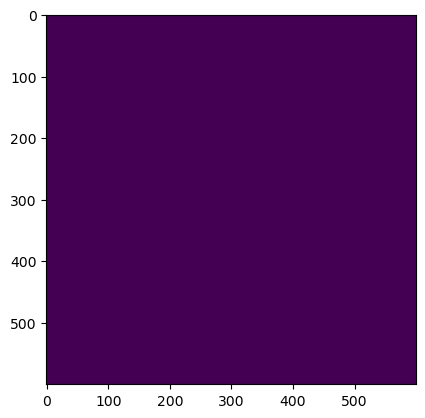

In [26]:
plt.imshow(mask_array==5)

So the third cell in the table is located for pixel where `mask_array == 5` (because 5 is an `ObjectId` for this particular cell).

`image_array` stores information about the marker expression. The channels are in the same ordering as in `train_anndata.var`. Now - let us have a look at the `SMA` expression for our image:

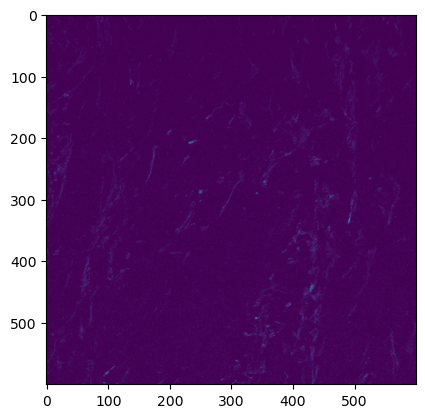

In [10]:
plt.imshow(image_array[2])

Seems bleaky? Let's have a look at the `SMA` marker distribution on this image:

(array([6.41465950e-02, 3.20609319e-04, 3.47670251e-05, 8.60215054e-06,
        3.76344086e-06, 1.07526882e-06, 3.58422939e-07, 1.79211470e-07,
        0.00000000e+00, 1.79211470e-07]),
 array([  0. ,  15.5,  31. ,  46.5,  62. ,  77.5,  93. , 108.5, 124. ,
        139.5, 155. ]),
 <BarContainer object of 10 artists>)

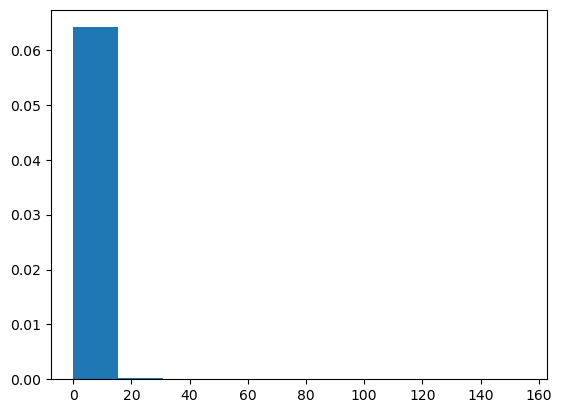

In [11]:
plt.hist(image_array[2].flatten(), density=True)

Well, we can see that it is heavy-tailed. A standard way of dealing with this problem is to apply an `arcsinh(x/5.)` transform:

(array([1.99634287e+00, 2.41139488e-01, 1.11531219e-01, 4.94796961e-02,
        1.71415650e-02, 5.22255770e-03, 1.41332103e-03, 4.17266208e-04,
        1.27871902e-04, 2.01903004e-05]),
 array([0.        , 0.41273944, 0.82547889, 1.23821833, 1.65095777,
        2.06369721, 2.47643666, 2.8891761 , 3.30191554, 3.71465499,
        4.12739443]),
 <BarContainer object of 10 artists>)

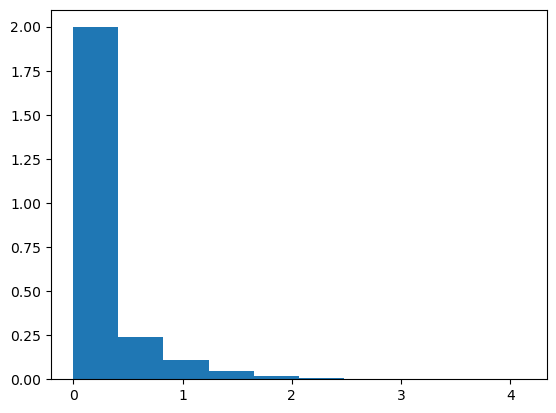

In [12]:
import numpy as np


plt.hist(np.arcsinh(image_array[2].flatten() / 5.0), density=True)

Well - much better. And this is how it looks on the image:

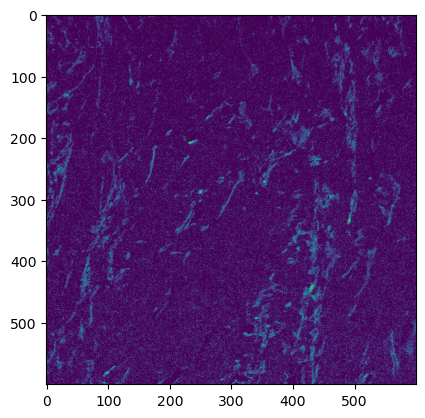

In [13]:
plt.imshow(np.arcsinh(image_array[2] / 5.))

**NOTE:** Please use an `arcsinh(x / 5.)` transform on your data.

For more on the `imc` data preprocessing - look [here](https://bodenmillergroup.github.io/ImcSegmentationPipeline/prepro.html#conversion-from-ometiff-to-multi-channel-tiffs).

# Baselines training

Apply a baseline technique for the classification (3pts). Each team should try at least three popular techniques on the provided data. Among these three popular techniques, there should be:
 - one linear baseline (e.g., multiclass logistic regression, SVM, etc.),
 - one gradient boosting technique (e.g., XGBoost, CatBoost, etc.),
 - one additional technique of your choice.



Please report:

- overall Accuracy, and macro-f1,
- per cell type average_precision and AUC.


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [71]:
def cv(dataset, classifs, num_splits=1, predicts='type', test_set=None, random_seed=1):
    """
    This function trains and validates the classification models on a dataset, with possibility of predicting on a test set, as well as conducting a cross validation.
    :param dataset: Training dataset in the form of pd.DataFrame
    :param classifs: List of classification models to be trained and validated
    :param num_splits: number of splits to use in cross validation procedure, defaults to 1 in simple train - test split (80/20)
    :param predicts: name of columns with feature to be predicted by models, defaults to 'type'
    :param test_set: Test dataset to be used for validation, defaults to None, in the form of pd.DataFrame
    :param random_seed: random seed to be set
    :return:  `mxs` - list of confusion matrices, `rets` - list of classifiers 
    """
    
    np.random.seed(random_seed)  # Set random seed

    print('#' * 160)
    
    msk = (np.random.rand(len(dataset)) < .8) if test_set is None else (np.random.rand(len(dataset)) < .0)
    valid = dataset[~msk]
    dataset = dataset[msk]
    if test_set is not None:
        valid = test_set
    mxs = []
    rets = []
    
    for classif in classifs:
        ret = []
        clfs = []
        print(classif)
        
        for _ in range(num_splits):
            classifier = classif #(**arg)
            
            msk = np.random.rand(len(dataset)) < 1 / num_splits
            train = dataset[msk]
            test = dataset[~msk]
            df = train

            X, y = df.loc[:, df.columns != predicts], df[predicts]

            X_train, X_test, y_train, y_test = (X, test.loc[:, df.columns != predicts], y, test[predicts])

            classifier.fit(X_train, y_train)
            if num_splits > 1:
                y_pred = classifier.predict_proba(X_test)
                try:
                    roc = roc_auc_score(y_test, y_pred, multi_class='ovr')
                except ValueError as e:
                    roc = 0
                    raise e
                ret.append(roc)
            else:
                y_pred  = []
                ret = [1]
            clfs.append((classifier, y_test, y_pred))

        X, y = valid.loc[:, valid.columns != predicts], valid.loc[:,  predicts]
        if num_splits > 1:
            print(f"mean ROC: {np.mean(ret)}, std: {np.std(ret)}")
            print(f"maximum ROC: {np.max(ret)} ")
            print("Beneath are the results for the model with the highest ROC")
        clf = clfs[np.argmax(ret)][0]
        rets.append(clf)
        y_pred = clf.predict(X)
        y_pred_proba = clf.predict_proba(X)
        print(classification_report(y, y_pred))
        mxs.append(confusion_matrix(y, y_pred, normalize='true'))
        print(f"ROC: {roc_auc_score(y, y_pred_proba, multi_class='ovr')}")
        print(f"Acc: {accuracy_score(y, y_pred)}")
        print(f"Precision: {precision_score(y, y_pred, average='macro')}")
        print(f"Recall: {recall_score(y, y_pred, average='macro')}")
        print(f"Macro F1: {f1_score(y, y_pred, average='macro')}")


        print('#' * 160, '\n')
    return mxs, rets


In [66]:
classifiers = [LogisticRegression(max_iter=10000, verbose=False, n_jobs=4),  GradientBoostingClassifier(), MLPClassifier(max_iter=10000)]

## Create feature set
Using expression levels and some of the geometrical features of cells as training features.

In [17]:
print(f"Min: {train_anndata.layers['exprs'].min(axis=0)}, max: {train_anndata.layers['exprs'].max(axis=0)}")

Min: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01328389
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.11198864 0.15576028], max: [5.11355587 7.36752219 4.93010012 4.83140713 5.07399691 6.89839437
 4.03587936 7.41153327 4.50487898 5.35673242 6.32528204 5.72497084
 7.10786882 6.37815185 7.20023394 4.93198218 4.872643   4.06376139
 4.64268743 5.5142484  6.3876692  5.96047777 5.13434987 8.43607053
 6.38489085 5.06403273 5.80712708 6.93966169 5.55383502 6.96082613
 4.95671524 5.86123293 6.65410915 6.04938018 6.67637488 5.89418901
 6.08984891 5.31215323 7.3416977  7.92386638]


In [59]:
data_set = np.c_[train_anndata.layers['exprs'], train_anndata.obs[['area', 'major_axis_length', 'minor_axis_length', 'eccentricity']],  # Training features
train_anndata.obs['cell_labels'].astype('category')]  # Features to be predicted, changed to int values
data_set = pd.DataFrame(data_set, columns=train_anndata.var['marker'].tolist()+['area', 'major_axis_length', 'minor_axis_length', 'eccentricity', 'type'])
# data_set.columns = [*data_set.columns[:-1], 'type']  # Naming the last column as 'type', can be whatever, but must be consistent with `predicts` argument of cv 

In [60]:
data_set.head()

,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,CD15,CD45RA,CD163,...,CD303,CD206,cleavedPARP,DNA1,DNA2,area,major_axis_length,minor_axis_length,eccentricity,type
0,0.0,0.356404,0.100361,0.250455,0.10282,0.6248,0.080672,0.090959,0.105551,0.559954,...,0.0,0.665901,0.084753,0.847186,0.923356,13.0,6.0948,2.780135,0.889904,MacCD163
1,0.027181,0.462005,0.225477,0.100934,0.120873,0.141697,0.083864,0.020021,0.148059,0.065923,...,0.013774,0.148382,0.023722,0.885503,0.954479,56.0,21.520654,3.368407,0.987675,Mural
2,0.033175,0.435122,0.275759,0.342161,0.09158,0.733683,0.000721,0.11234,0.244849,0.342814,...,0.080635,0.435028,0.003028,0.796686,0.8551,12.0,5.294329,2.86222,0.841267,DC
3,0.033175,0.227001,0.112406,0.231138,0.102567,0.396472,0.129685,0.050009,0.238727,0.196804,...,0.03923,0.188186,0.046602,0.69092,0.789117,12.0,5.294329,2.86222,0.841267,Tumor
4,0.027496,0.428921,0.17754,0.099366,0.082474,0.295517,0.019625,0.041701,0.183543,0.248609,...,0.012313,0.321038,0.074387,0.824742,0.902713,29.0,9.21667,4.112503,0.894932,Tumor


In [21]:
matrices, baselines = cv(data_set, classifiers, num_splits=1)  # Training and validating

################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4, verbose=False)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.82      0.50      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.72      0.78       234
  Neutrophil       0.95      0.96      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.81      0.83       339
      plasma       0.9

Beneath I've visualised the confusion matrices of baseline methods

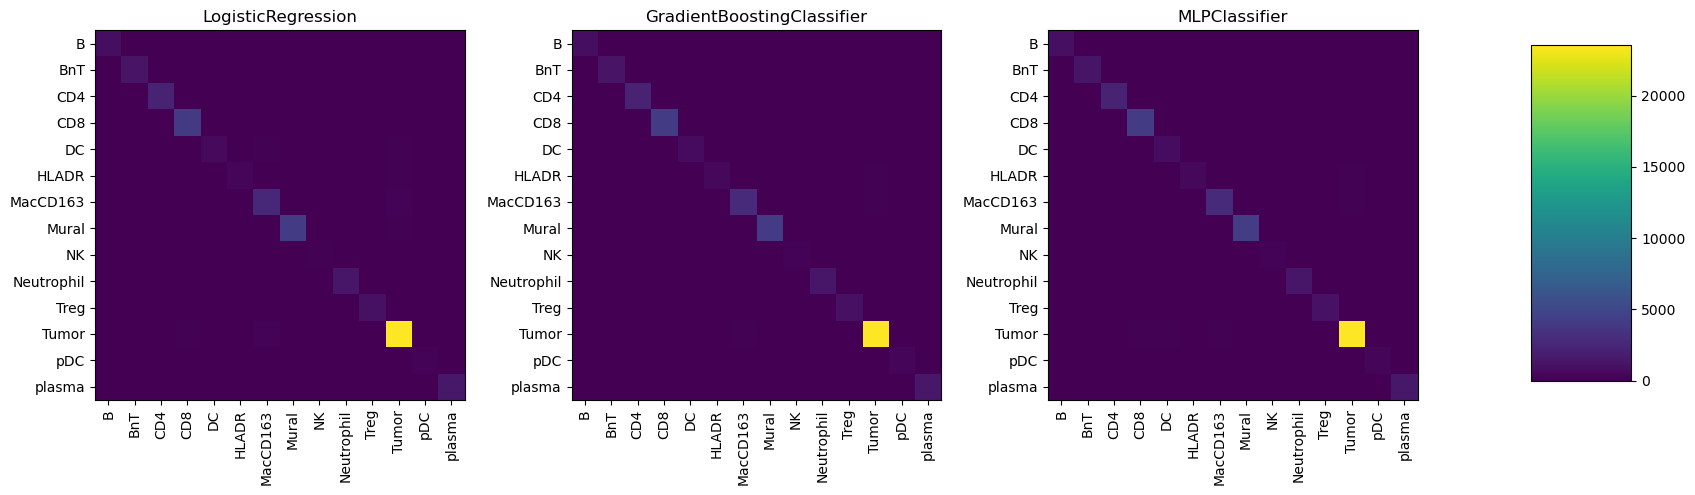

In [22]:

ticks = train_anndata.obs['cell_labels'].astype('category').cat.categories
fig, axs = plt.subplots(1, len(classifiers))
for i in range(len(classifiers)):
    im = axs[i].imshow(matrices[i])
    axs[i].set_title(f"{type(classifiers[i]).__name__}")
    axs[i].set_xticks(range(len(ticks)))
    axs[i].set_yticks(range(len(ticks)))
    axs[i].set_xticklabels(ticks, rotation=90)
    axs[i].set_yticklabels(ticks)

fig.set_figwidth(20)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)


plt.show()

## Saving baselines
I save baseline classifiers as pickle objects.

In [23]:
import pickle
for i, baseline in enumerate(baselines):
    with open(f'baseline_{i+1}_{type(classifiers[i]).__name__}.pkl', 'wb') as f:
        pickle.dump(baseline, f) 


## Loading baselines

Example showing how to load the baselines.

In [24]:
with open('baseline_2_GradientBoostingClassifier.pkl', 'rb') as f:
    gradient_boost = pickle.load(f)
preds = gradient_boost.predict(data_set.loc[:, data_set.columns != 'type'])

In [25]:
print(classification_report(data_set['type'], preds))

              precision    recall  f1-score   support

           B       0.96      0.95      0.95      4862
         BnT       0.94      0.95      0.95      6810
         CD4       0.94      0.94      0.94     12839
         CD8       0.95      0.98      0.97     21042
          DC       0.86      0.83      0.84      4768
       HLADR       0.90      0.68      0.78      3699
    MacCD163       0.91      0.91      0.91     15638
       Mural       0.98      0.98      0.98     22169
          NK       0.89      0.86      0.88      1122
  Neutrophil       0.97      0.98      0.98      7193
        Treg       0.97      0.97      0.97      5715
       Tumor       0.98      0.98      0.98    121460
         pDC       0.96      0.93      0.95      1659
      plasma       0.97      0.96      0.96      7815

    accuracy                           0.96    236791
   macro avg       0.94      0.92      0.93    236791
weighted avg       0.96      0.96      0.96    236791



# Most important features

In [77]:
from sklearn.feature_selection import f_classif, mutual_info_classif
mi = mutual_info_classif(data_set.drop(columns='type'), data_set['type'])
print(mi)
indi = np.argsort(mi)[::-1]
data_set.columns[indi]

[0.15213074 0.03323993 0.11022932 0.14856269 0.13098288 0.2808351
 0.20525381 0.13148231 0.2018282  0.23373553 0.11477531 0.22939925
 0.17914494 0.05220375 0.4523567  0.05967229 0.21047166 0.12223763
 0.2153606  0.25449596 0.10075969 0.08502004 0.06871967 0.26245139
 0.15190987 0.12729443 0.31915163 0.11237359 0.06427449 0.10901198
 0.15024972 0.16342676 0.27346332 0.12608457 0.29868171 0.08673995
 0.13474132 0.04315495 0.02526183 0.02633651 0.07979857 0.06797121
 0.08192215 0.02180239]


Index(['CD3', 'CD8a', 'Ecad', 'HLADR', 'CD4', 'CD45RO', 'CD7', 'CD163', 'CD20',
       'PDGFRb', 'CD11c', 'CD27', 'CD45RA', 'CD68', 'CD40', 'MPO', 'FOXP3',
       'VISTA', 'CD16', 'CD206', 'CD15', 'CD38', 'ICOS', 'CD14', 'PD1', 'B2M',
       'CarbonicAnhydrase', 'SMA', 'Ki67', 'GrzB', 'CD303', 'PDL1',
       'minor_axis_length', 'area', 'TCF7', 'major_axis_length', 'CD33',
       'LAG3', 'Ido1', 'cleavedPARP', 'HistoneH3', 'DNA2', 'DNA1',
       'eccentricity'],
      dtype='object')

In [76]:
anov = f_classif(data_set.drop(columns='type'), data_set['type'])
print(anov[0])
indi = np.argsort(anov[0])[::-1]
data_set.columns[indi]

[41519.25706104   473.18366494  5371.94598532  6420.72340148
  7909.52594037 12113.87314513 11126.22520337  6030.40804017
 14410.92899042 12908.59187453  3501.493251   24915.53918363
  8700.77976019   923.33985591 46271.01631718  1825.32870604
  9902.50544929  4769.2628984  10607.6614289  14486.25522791
  3274.64816788  1970.16335122  2412.55864719 11140.9774613
 11992.35312522  4990.61712048 33608.25566968  3317.63482036
  2141.55091839  3106.52729293  6631.3370769   6363.47526962
 13579.20951505  4634.25203716 14225.02409683  2891.54459172
  6148.54003323   588.83004179   600.14814101   595.85115559
  2543.42139308  2022.41492555  2553.9515199     98.28250562]


Index(['CD3', 'MPO', 'CD8a', 'CD20', 'CD7', 'CD45RA', 'Ecad', 'CD4', 'CD163',
       'HLADR', 'FOXP3', 'CD45RO', 'CD27', 'PDGFRb', 'CD11c', 'CD68', 'CD38',
       'VISTA', 'CD16', 'CD40', 'CD206', 'CD15', 'SMA', 'ICOS', 'PD1', 'CD14',
       'B2M', 'CarbonicAnhydrase', 'GrzB', 'Ki67', 'CD303',
       'minor_axis_length', 'area', 'TCF7', 'CD33', 'major_axis_length',
       'PDL1', 'LAG3', 'Ido1', 'DNA1', 'DNA2', 'cleavedPARP', 'HistoneH3',
       'eccentricity'],
      dtype='object')

Left out column: eccentricity
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.70      0.62      0.66       895
       HLADR       0.82      0.51      0.62       750
    MacCD163       0.85      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.73      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.81      0.83       339
      p

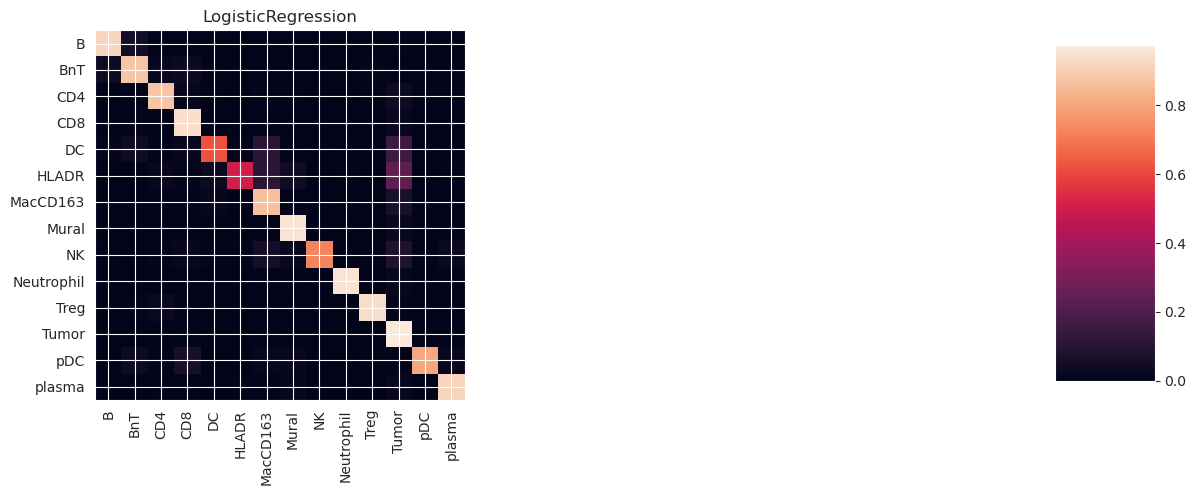

Left out column: DNA1
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.81      0.50      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.73      0.78       234
  Neutrophil       0.95      0.96      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.81      0.83       339
      plasma   

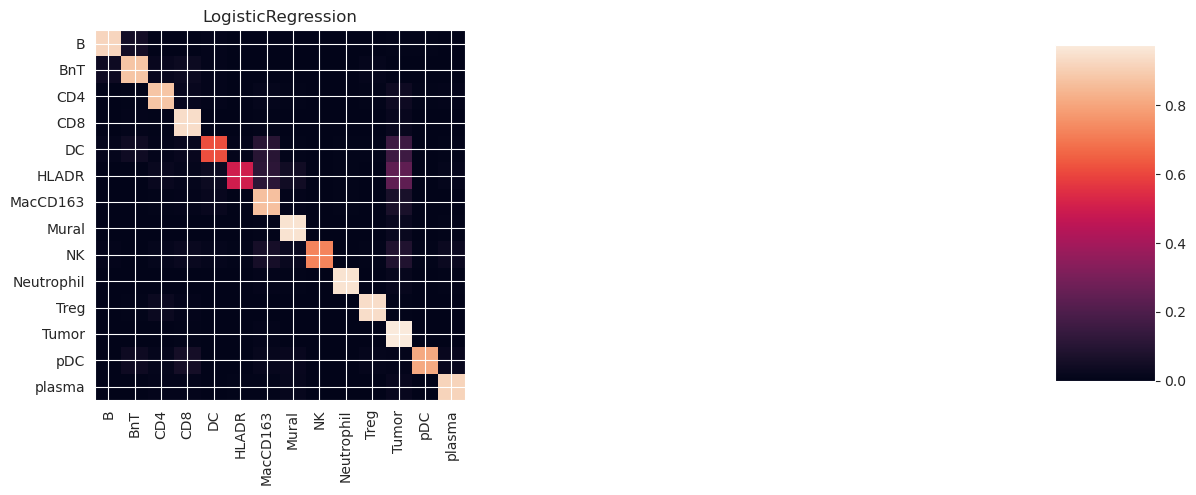

Left out column: DNA2
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.82      0.50      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.73      0.78       234
  Neutrophil       0.95      0.96      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.81      0.83       339
      plasma   

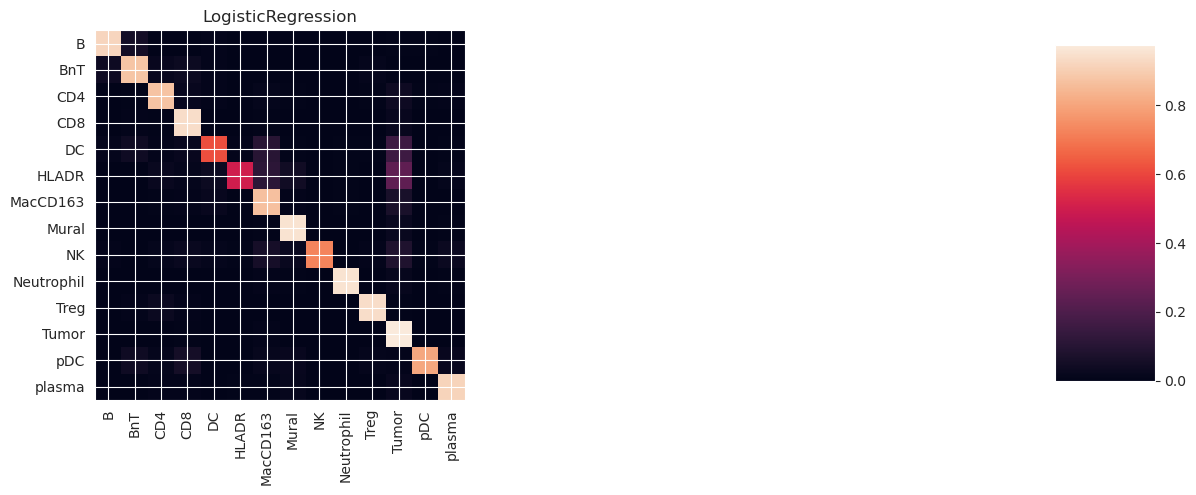

Left out column: HistoneH3
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.82      0.51      0.63       750
    MacCD163       0.85      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.83      0.72      0.77       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.80      0.82       339
      plas

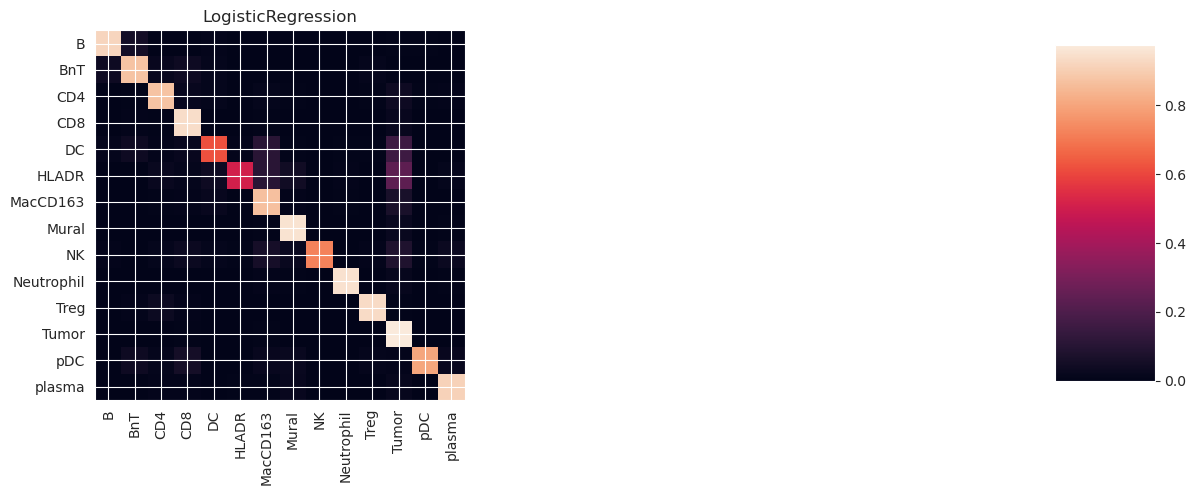

Left out column: cleavedPARP
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.70      0.62      0.65       895
       HLADR       0.81      0.50      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.73      0.78       234
  Neutrophil       0.95      0.96      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.81      0.83       339
      pl

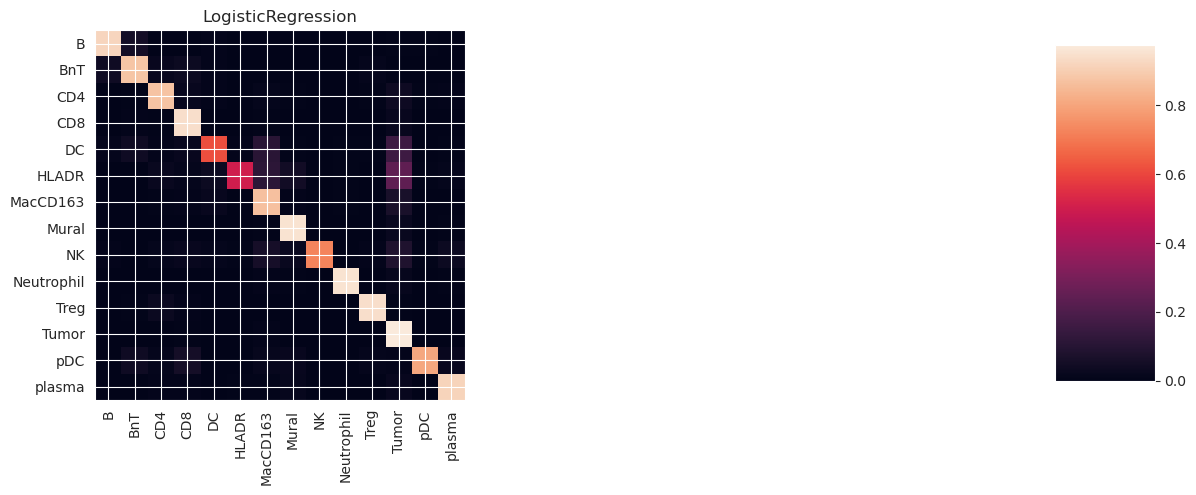

Left out column: Ido1
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.91       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.70      0.63      0.66       895
       HLADR       0.83      0.51      0.63       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.96      0.95      4338
          NK       0.84      0.72      0.77       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.81      0.82       339
      plasma   

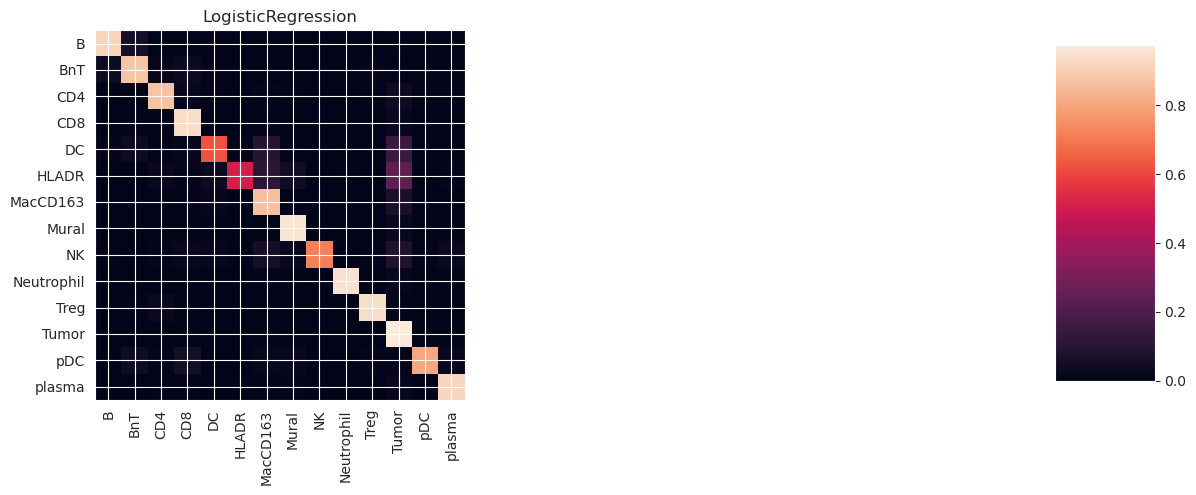

Left out column: LAG3
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.81      0.51      0.62       750
    MacCD163       0.85      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.85      0.73      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.81      0.82       339
      plasma   

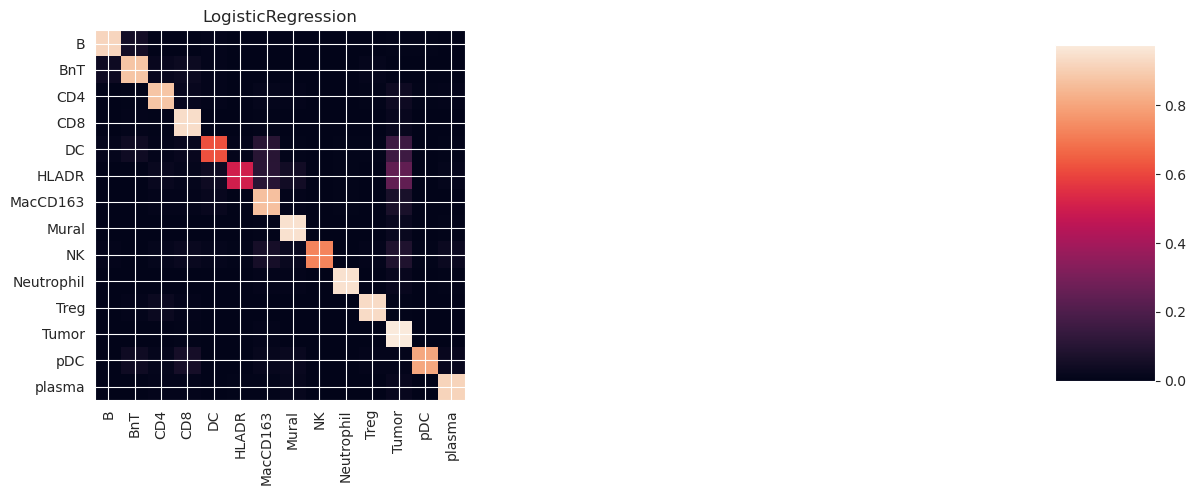

Left out column: CD33
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.87      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.61      0.65       895
       HLADR       0.82      0.50      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.72      0.77       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.83      0.81      0.82       339
      plasma   

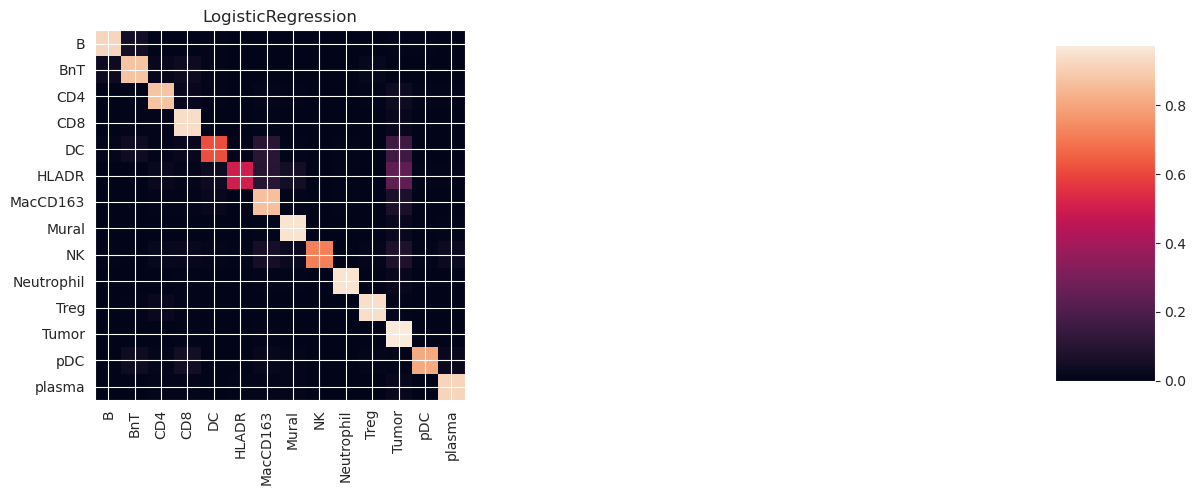

Left out column: TCF7
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.92      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.81      0.50      0.62       750
    MacCD163       0.84      0.87      0.85      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.83      0.72      0.77       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.81      0.82       339
      plasma   

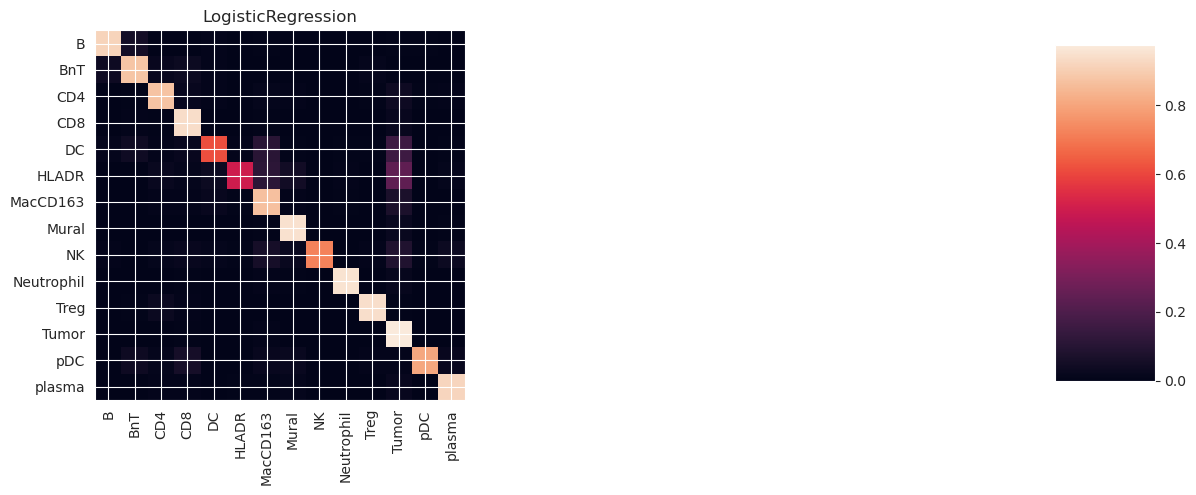

Left out column: major_axis_length
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.92      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.81      0.50      0.62       750
    MacCD163       0.84      0.87      0.85      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.72      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.81      0.82       339
  

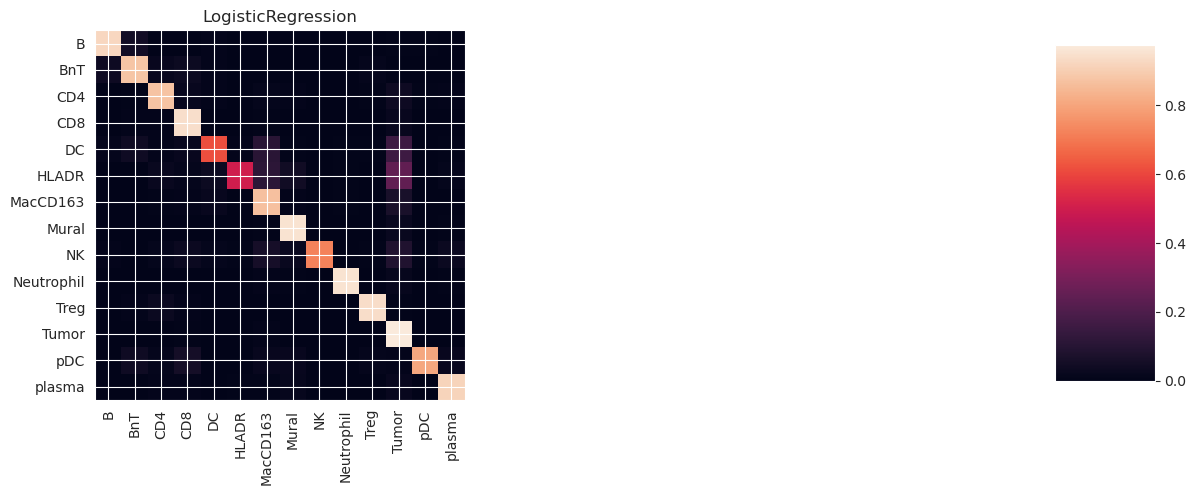

Left out column: area
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.82      0.51      0.63       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.73      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.80      0.82       339
      plasma   

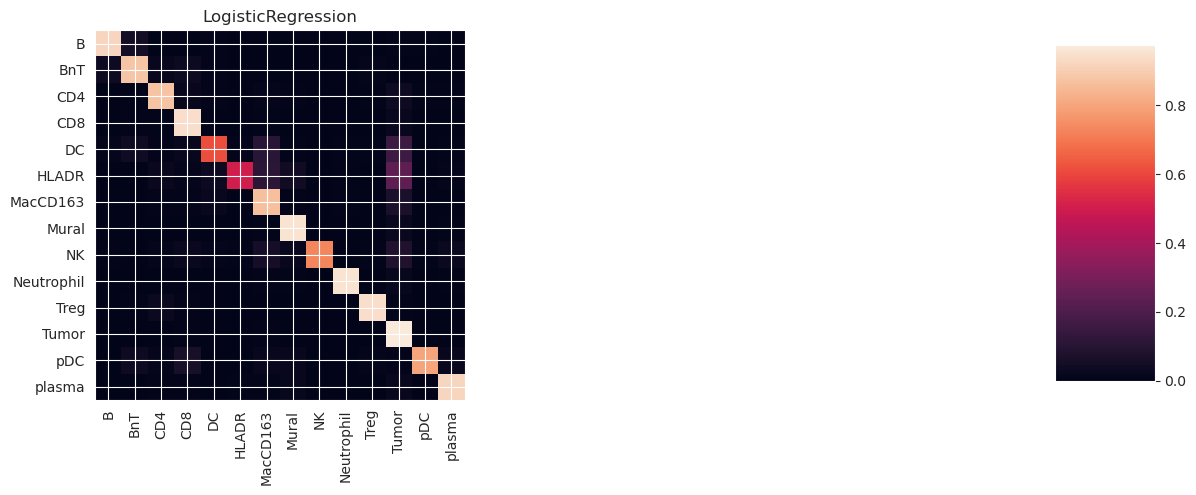

Left out column: minor_axis_length
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.82      0.51      0.63       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.73      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.80      0.82       339
  

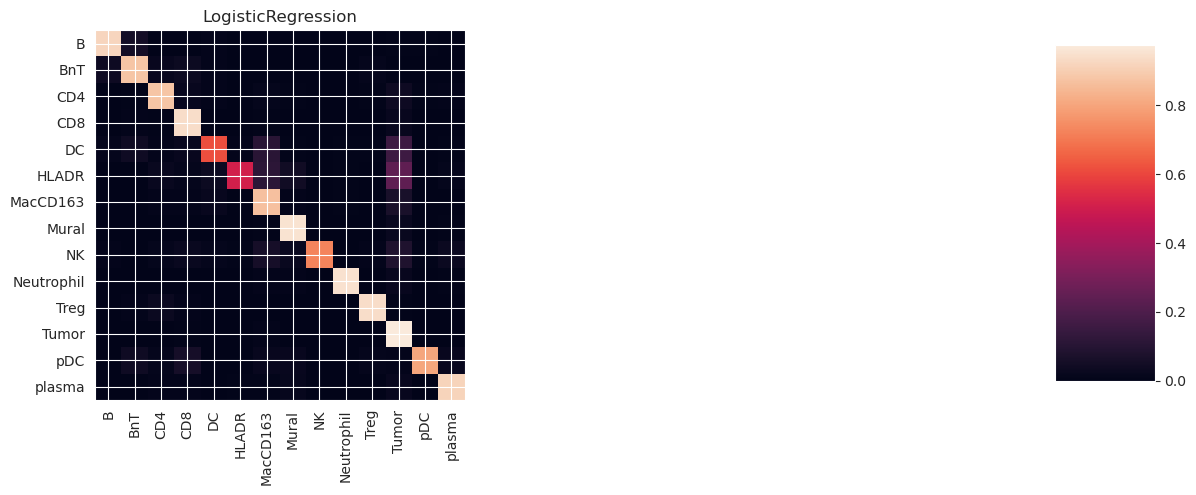

Left out column: PDL1
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.66       895
       HLADR       0.82      0.50      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.83      0.71      0.77       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.80      0.82       339
      plasma   

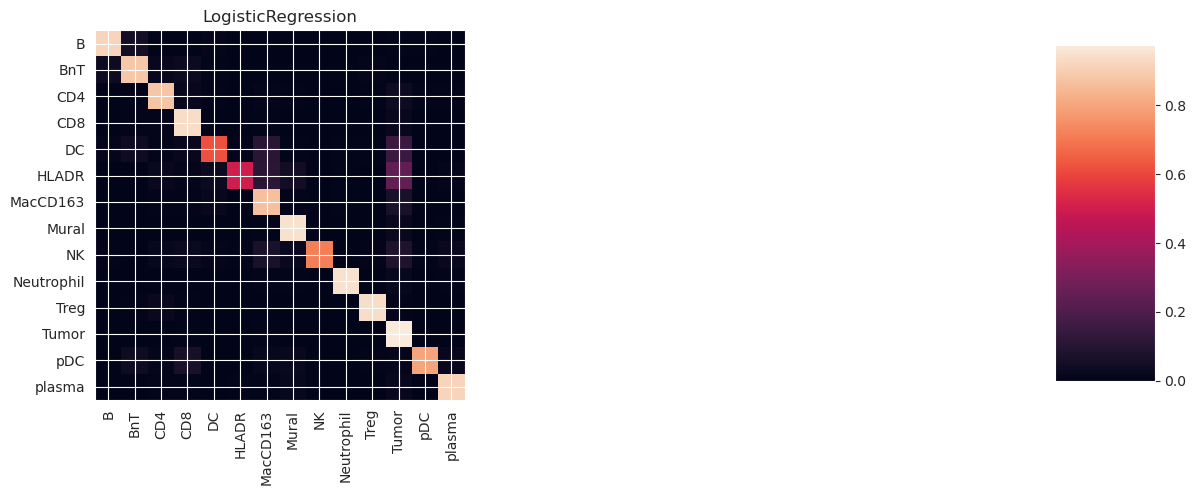

Left out column: CD303
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.90      0.92      0.91       972
         BnT       0.87      0.88      0.87      1382
         CD4       0.89      0.87      0.88      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.67      0.61      0.64       895
       HLADR       0.82      0.49      0.61       750
    MacCD163       0.84      0.86      0.85      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.83      0.72      0.77       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.93      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.57      0.32      0.41       339
      plasma  

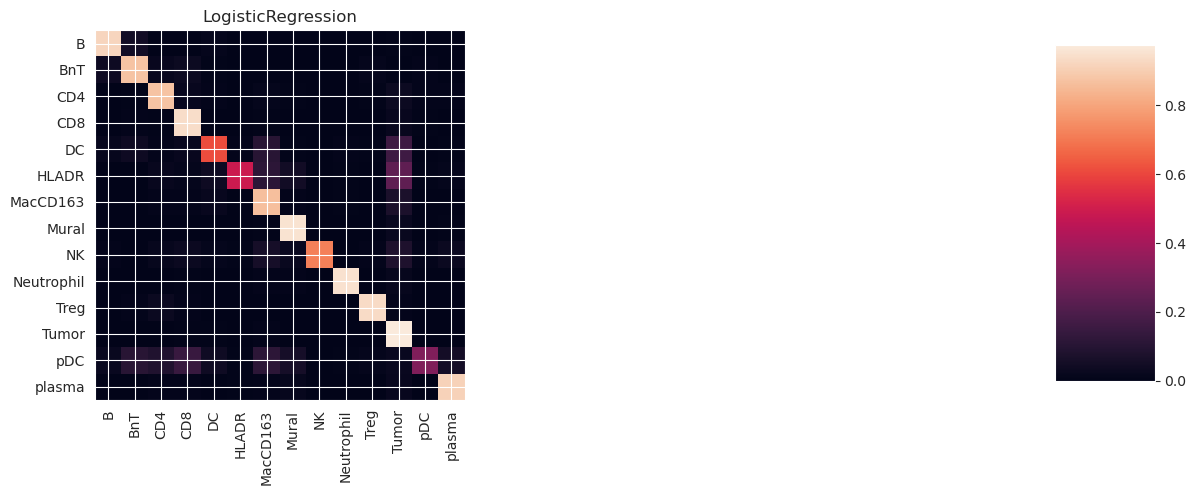

Left out column: GrzB
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.61      0.65       895
       HLADR       0.82      0.51      0.63       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.85      0.74      0.79       234
  Neutrophil       0.95      0.96      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.81      0.83       339
      plasma   

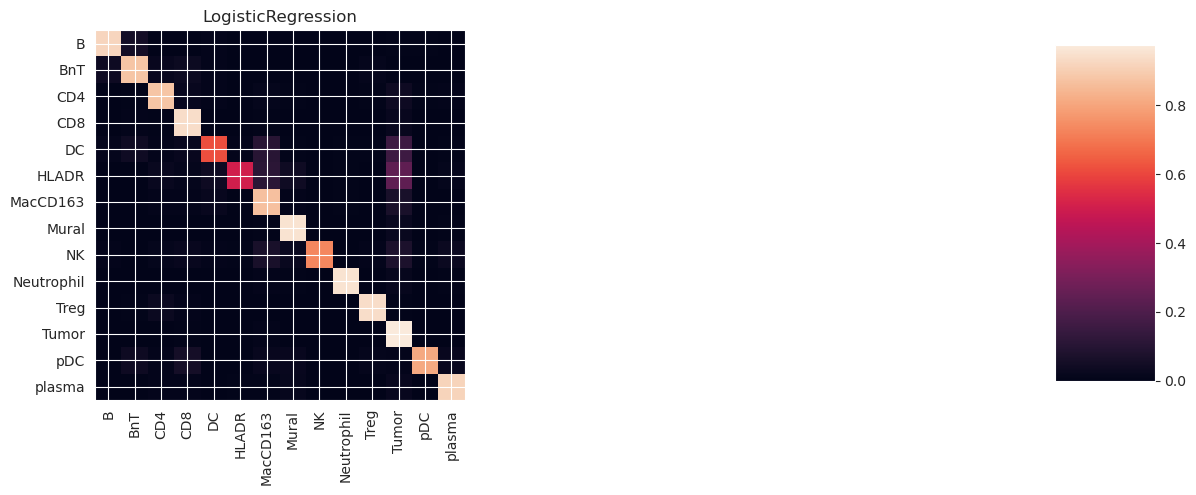

Left out column: Ki67
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.82      0.50      0.62       750
    MacCD163       0.85      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.72      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.80      0.83       339
      plasma   

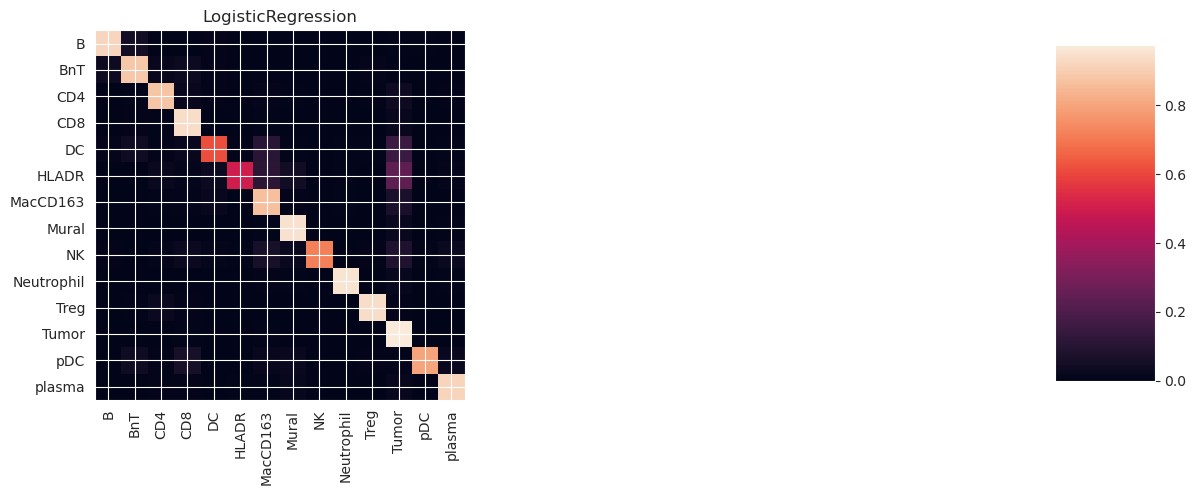

Left out column: SMA
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.66       895
       HLADR       0.81      0.51      0.62       750
    MacCD163       0.84      0.87      0.85      3147
       Mural       0.94      0.95      0.95      4338
          NK       0.85      0.72      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.80      0.82       339
      plasma    

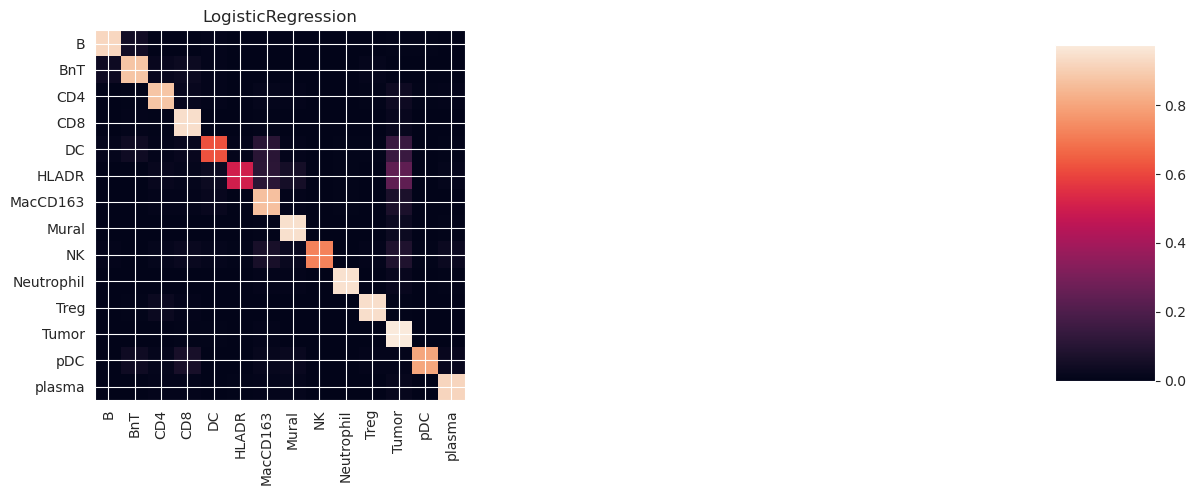

Left out column: CarbonicAnhydrase
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.93      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.69      0.63      0.66       895
       HLADR       0.76      0.42      0.54       750
    MacCD163       0.84      0.86      0.85      3147
       Mural       0.94      0.95      0.94      4338
          NK       0.86      0.72      0.79       234
  Neutrophil       0.96      0.96      0.96      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.97      0.97     24142
         pDC       0.85      0.79      0.82       339
  

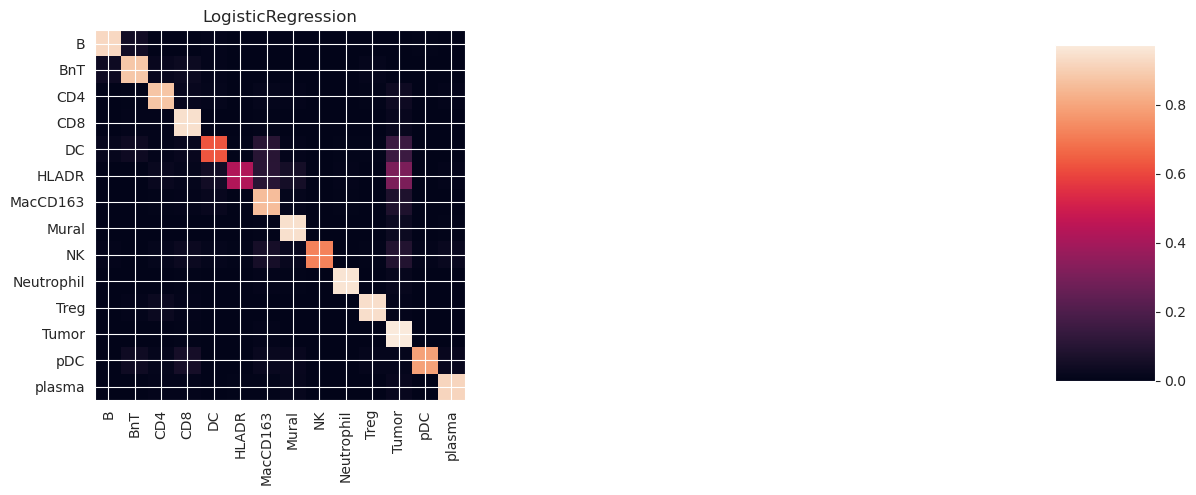

Left out column: B2M
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.82      0.50      0.62       750
    MacCD163       0.84      0.86      0.85      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.72      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.81      0.82       339
      plasma    

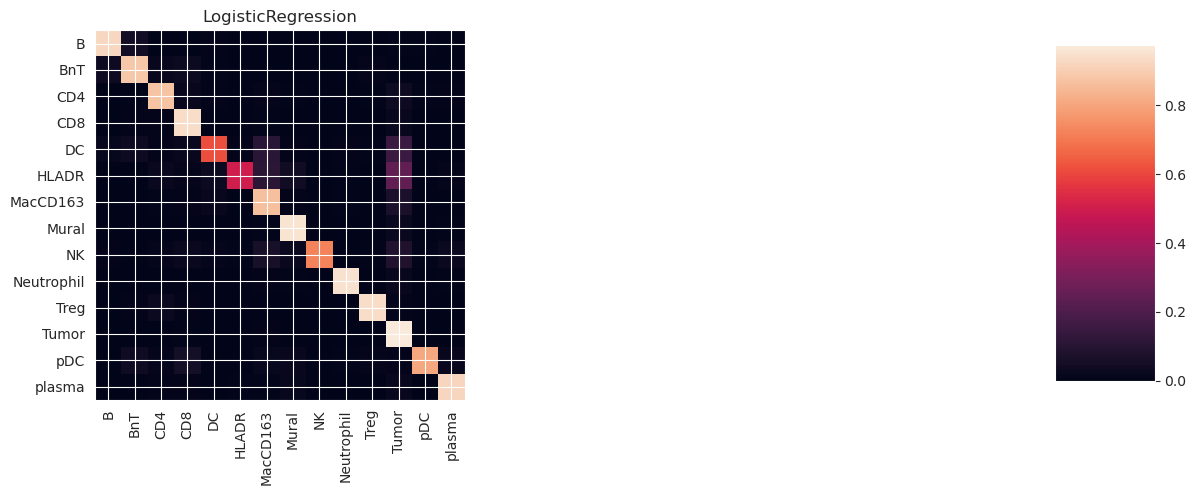

Left out column: PD1
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.81      0.50      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.72      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.81      0.83       339
      plasma    

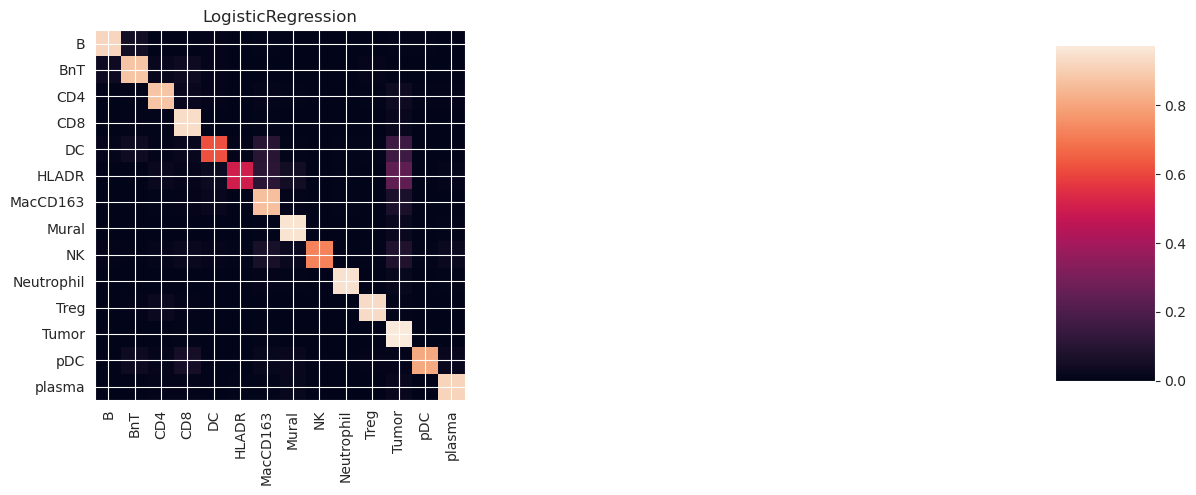

Left out column: CD14
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.81      0.50      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.72      0.77       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.80      0.82       339
      plasma   

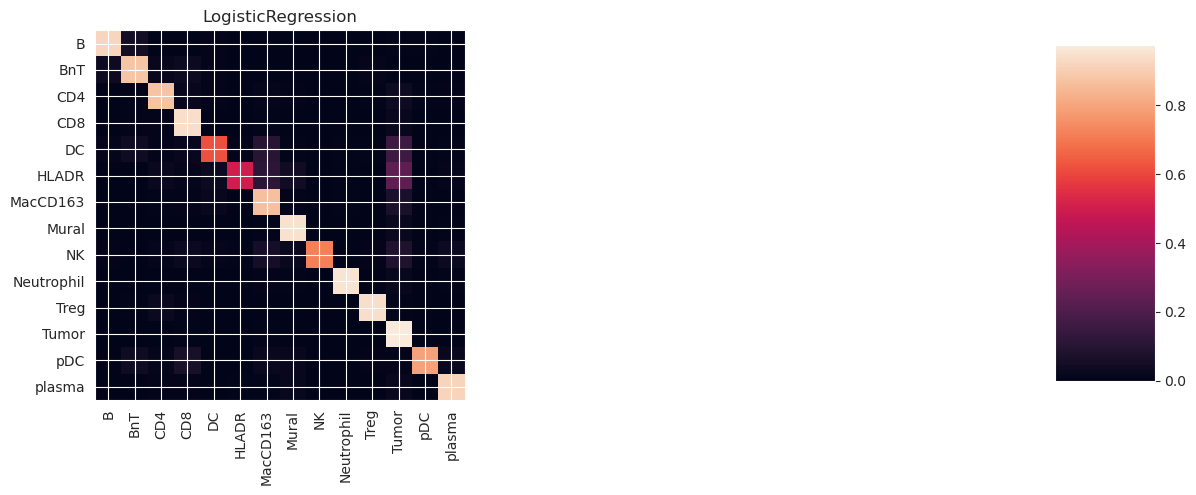

Left out column: ICOS
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.66       895
       HLADR       0.82      0.50      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.72      0.78       234
  Neutrophil       0.95      0.96      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.80      0.82       339
      plasma   

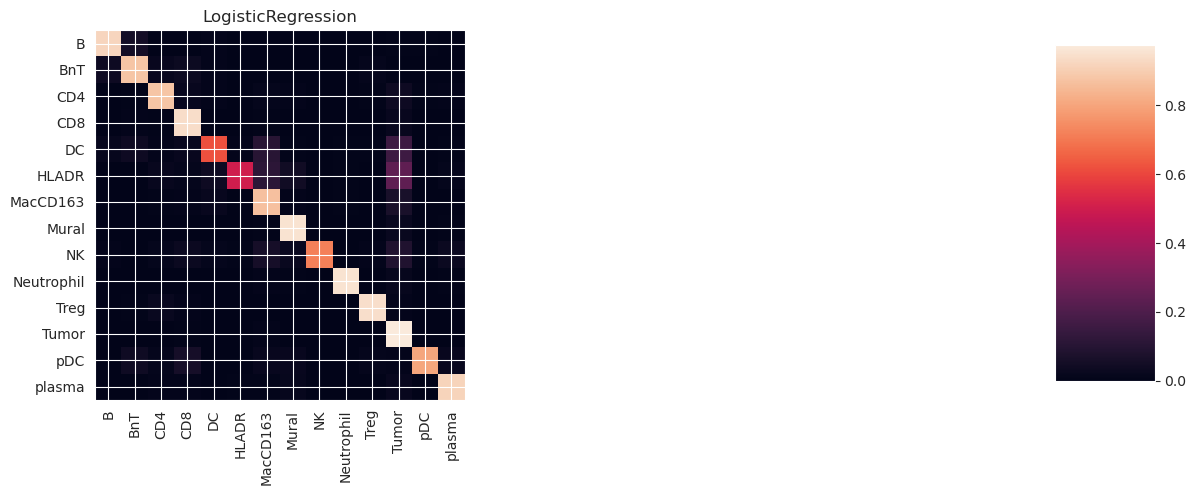

Left out column: CD38
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.68      0.61      0.65       895
       HLADR       0.80      0.51      0.62       750
    MacCD163       0.83      0.86      0.85      3147
       Mural       0.94      0.95      0.94      4338
          NK       0.84      0.74      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.80      0.83       339
      plasma   

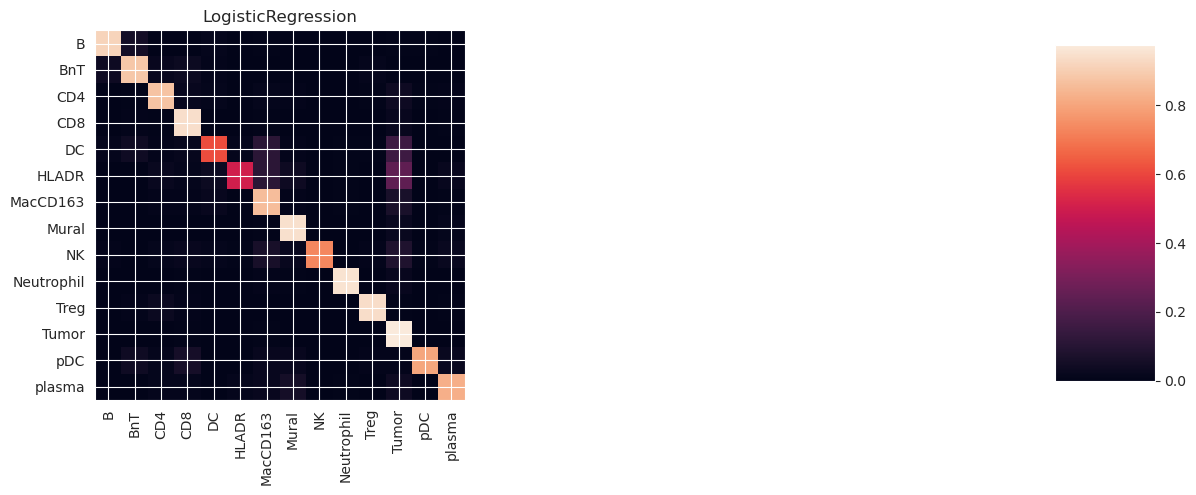

Left out column: CD15
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.91       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.82      0.50      0.62       750
    MacCD163       0.84      0.86      0.85      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.83      0.72      0.77       234
  Neutrophil       0.94      0.93      0.93      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.79      0.81       339
      plasma   

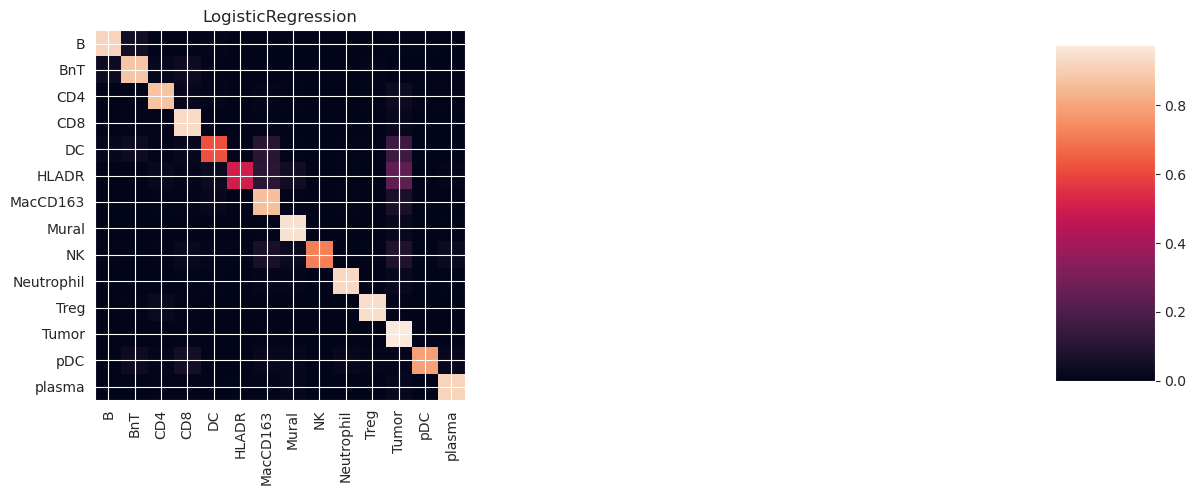

Left out column: CD206
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.92      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.70      0.62      0.66       895
       HLADR       0.82      0.51      0.62       750
    MacCD163       0.85      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.83      0.71      0.76       234
  Neutrophil       0.96      0.96      0.96      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.80      0.82       339
      plasma  

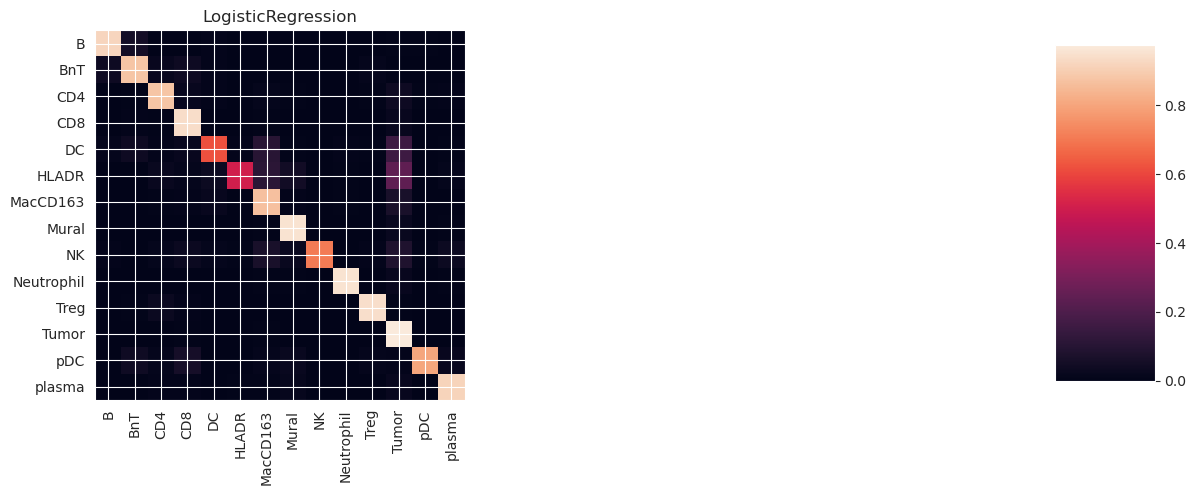

Left out column: CD16
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.82      0.50      0.62       750
    MacCD163       0.84      0.86      0.85      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.73      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.80      0.82       339
      plasma   

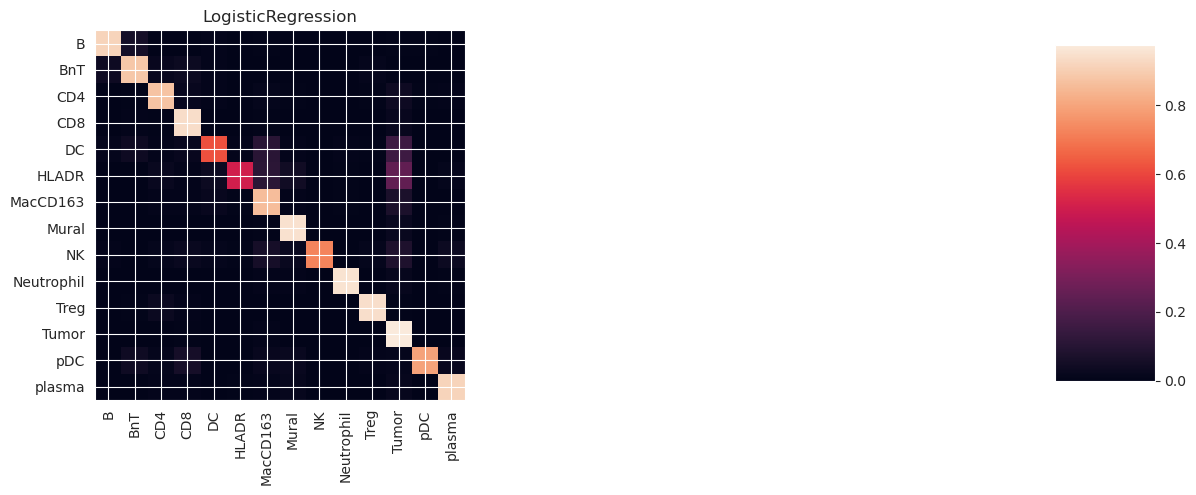

Left out column: VISTA
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.66       895
       HLADR       0.81      0.51      0.62       750
    MacCD163       0.85      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.85      0.74      0.79       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.81      0.82       339
      plasma  

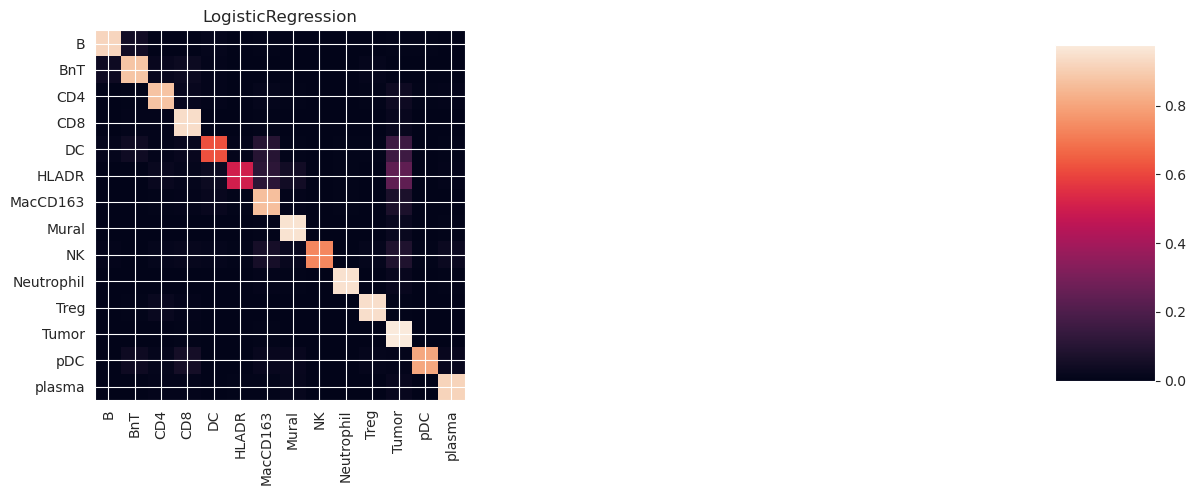

Left out column: FOXP3
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.89      0.89      1382
         CD4       0.84      0.83      0.83      2525
         CD8       0.90      0.93      0.91      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.81      0.50      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.72      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.78      0.68      0.73      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.81      0.83       339
      plasma  

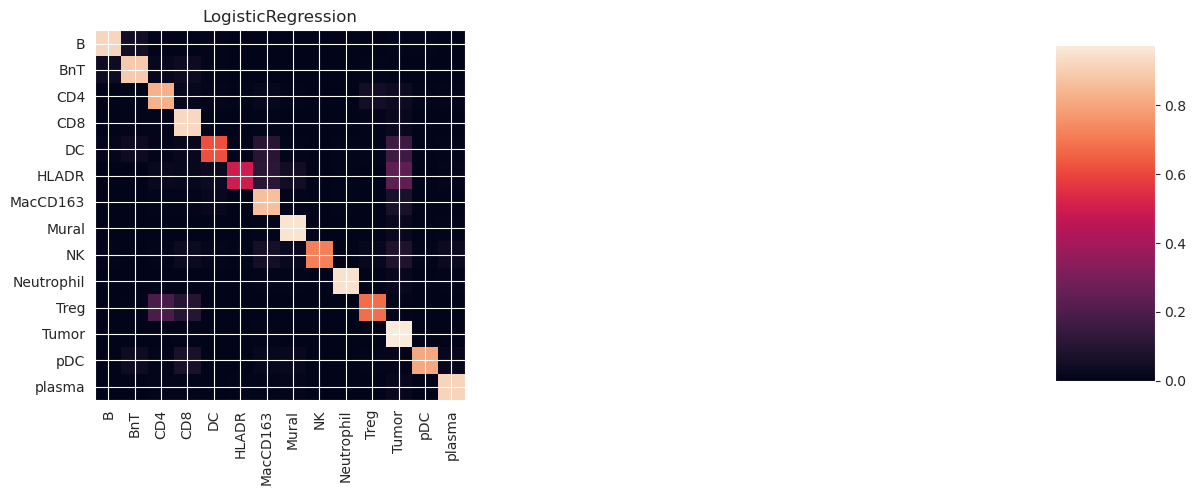

Left out column: MPO
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.69      0.61      0.65       895
       HLADR       0.82      0.50      0.62       750
    MacCD163       0.84      0.87      0.85      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.85      0.72      0.78       234
  Neutrophil       0.87      0.85      0.86      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.97      0.97     24142
         pDC       0.84      0.80      0.82       339
      plasma    

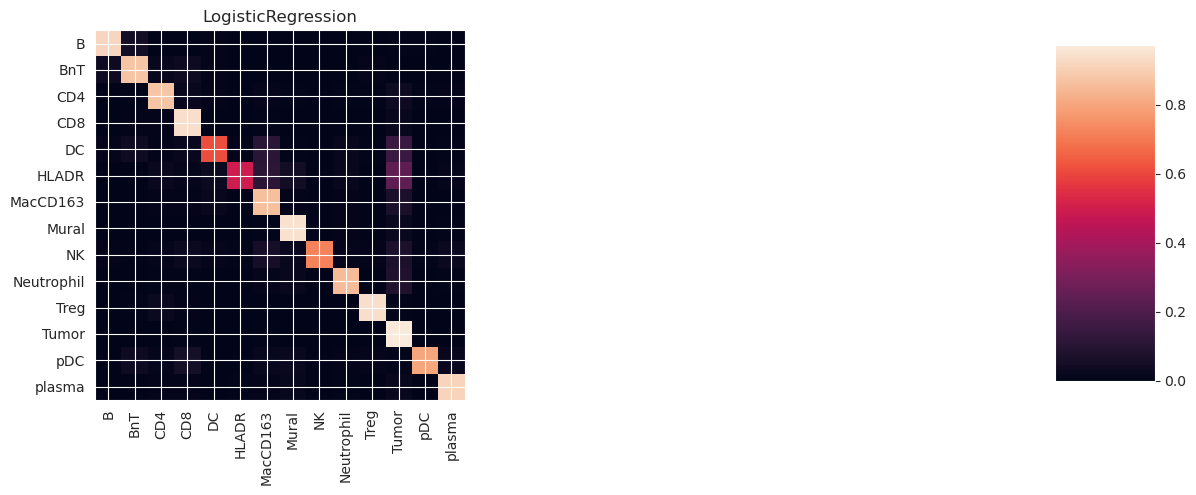

Left out column: CD40
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.92      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.81      0.50      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.72      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.80      0.82       339
      plasma   

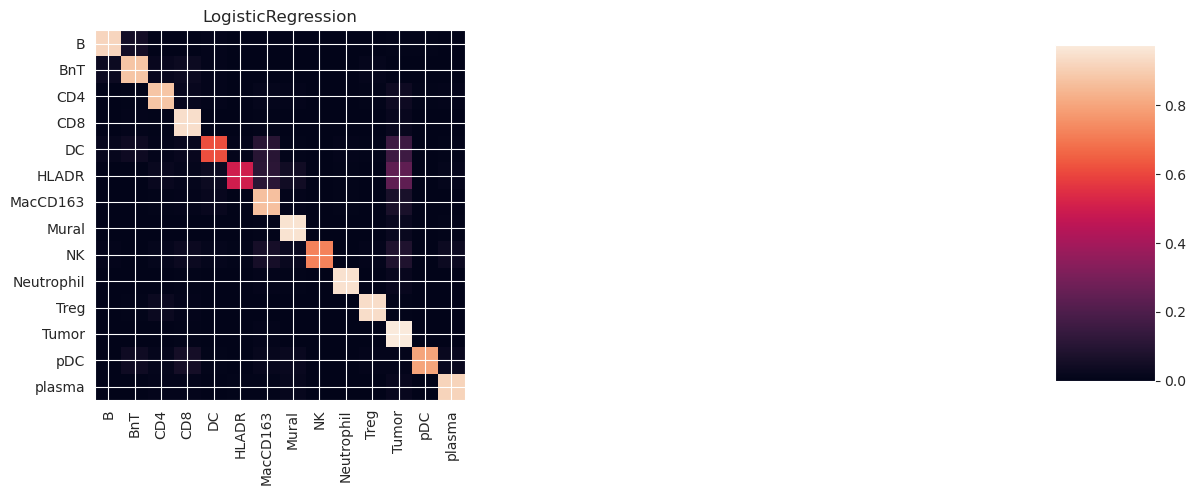

Left out column: CD68
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.92      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.70      0.61      0.65       895
       HLADR       0.82      0.50      0.62       750
    MacCD163       0.84      0.87      0.85      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.73      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.81      0.83       339
      plasma   

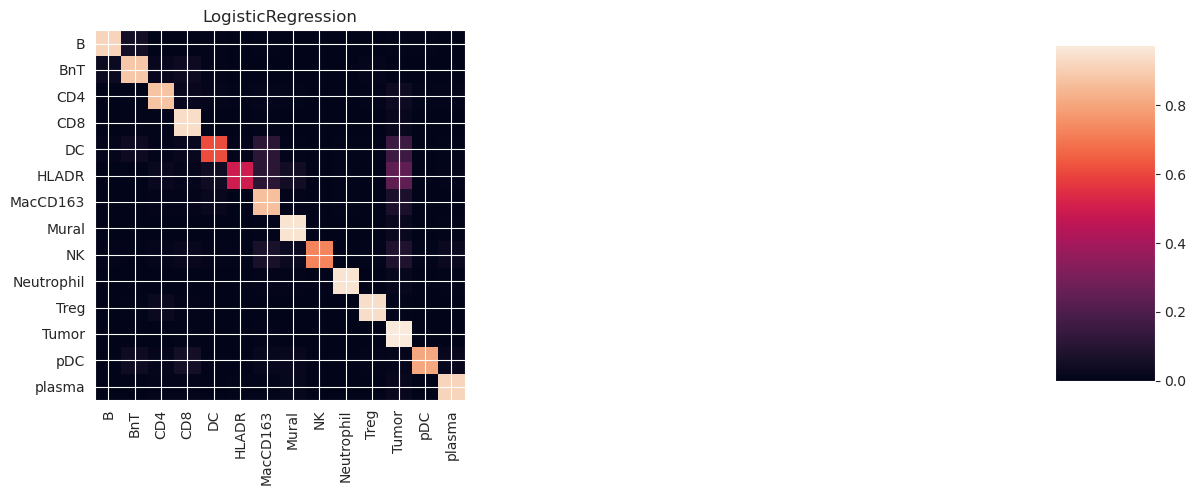

Left out column: CD45RA
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.70      0.62      0.66       895
       HLADR       0.82      0.51      0.63       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.86      0.71      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.81      0.82       339
      plasma 

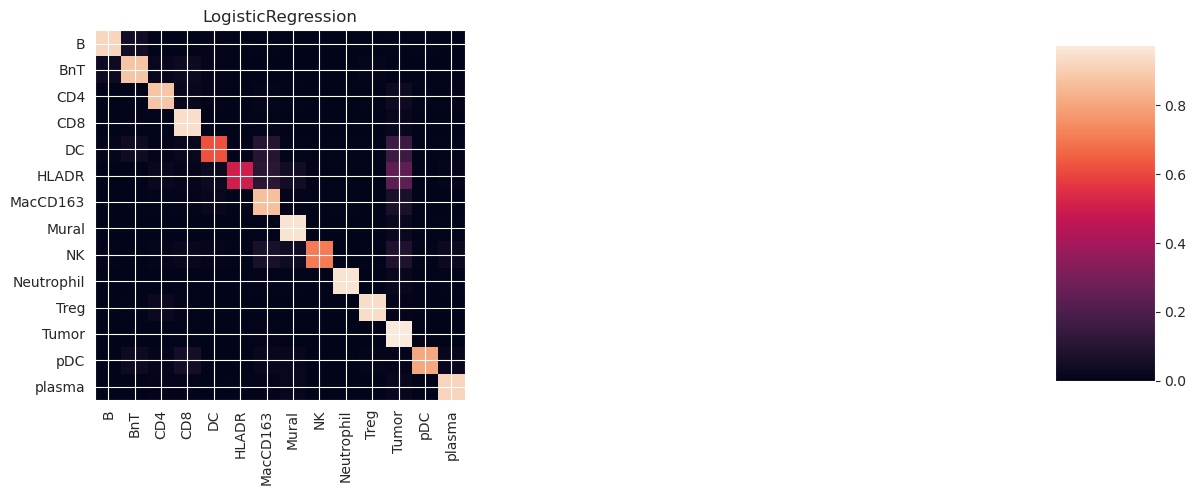

Left out column: CD27
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.82      0.51      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.73      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.80      0.82       339
      plasma   

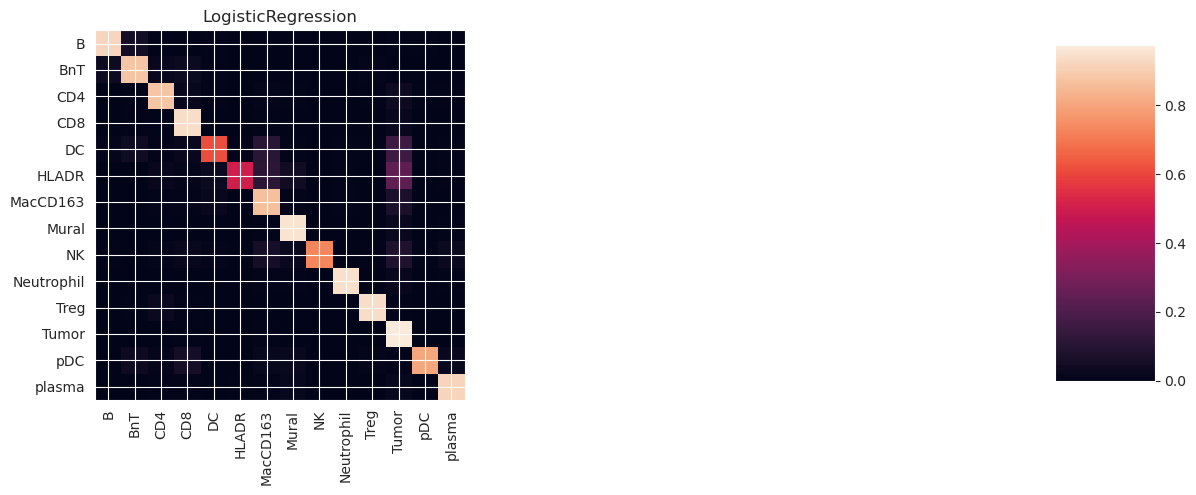

Left out column: CD11c
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.89      0.92      0.90       972
         BnT       0.88      0.87      0.87      1382
         CD4       0.90      0.87      0.89      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.57      0.43      0.49       895
       HLADR       0.67      0.41      0.51       750
    MacCD163       0.84      0.88      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.85      0.73      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.86      0.81      0.83       339
      plasma  

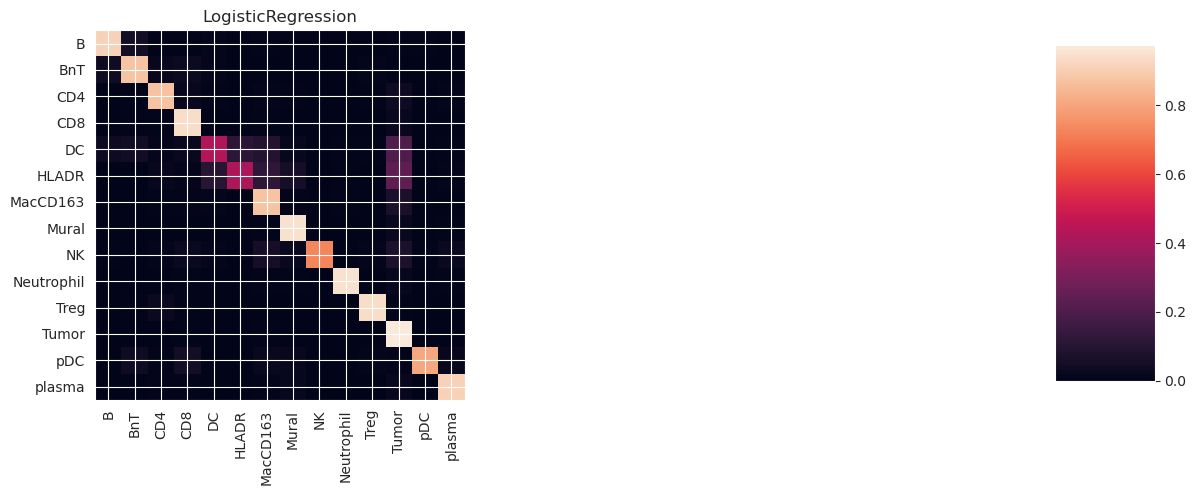

Left out column: PDGFRb
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.91      0.91       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.61      0.65       895
       HLADR       0.81      0.48      0.61       750
    MacCD163       0.84      0.87      0.85      3147
       Mural       0.93      0.90      0.92      4338
          NK       0.85      0.74      0.79       234
  Neutrophil       0.95      0.96      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.95      0.97      0.96     24142
         pDC       0.84      0.80      0.82       339
      plasma 

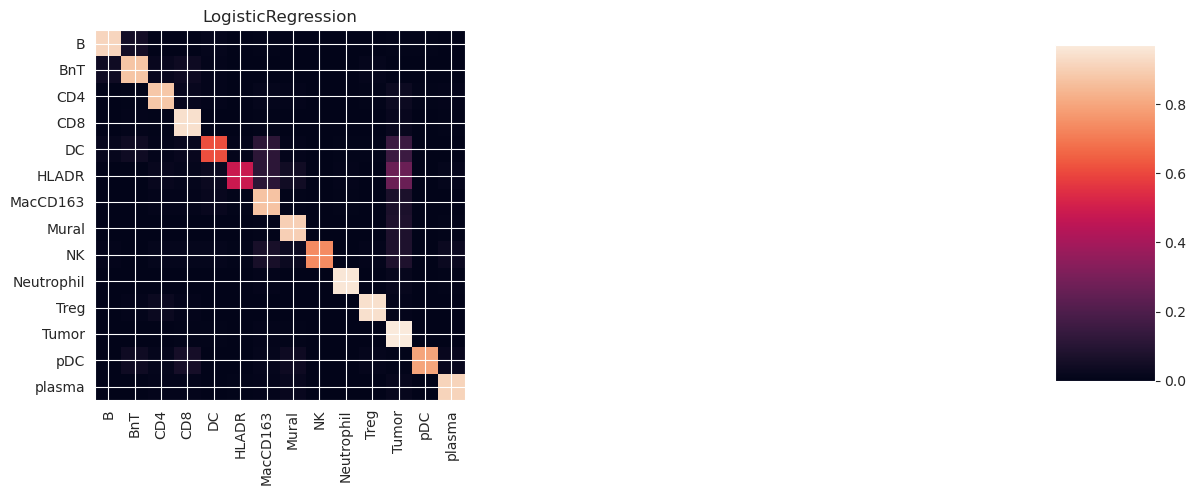

Left out column: CD20
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.89      0.84      0.87       972
         BnT       0.82      0.79      0.81      1382
         CD4       0.89      0.87      0.88      2525
         CD8       0.91      0.93      0.92      4204
          DC       0.68      0.63      0.65       895
       HLADR       0.80      0.48      0.60       750
    MacCD163       0.84      0.87      0.85      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.75      0.79       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.93      0.93      0.93      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.80      0.83       339
      plasma   

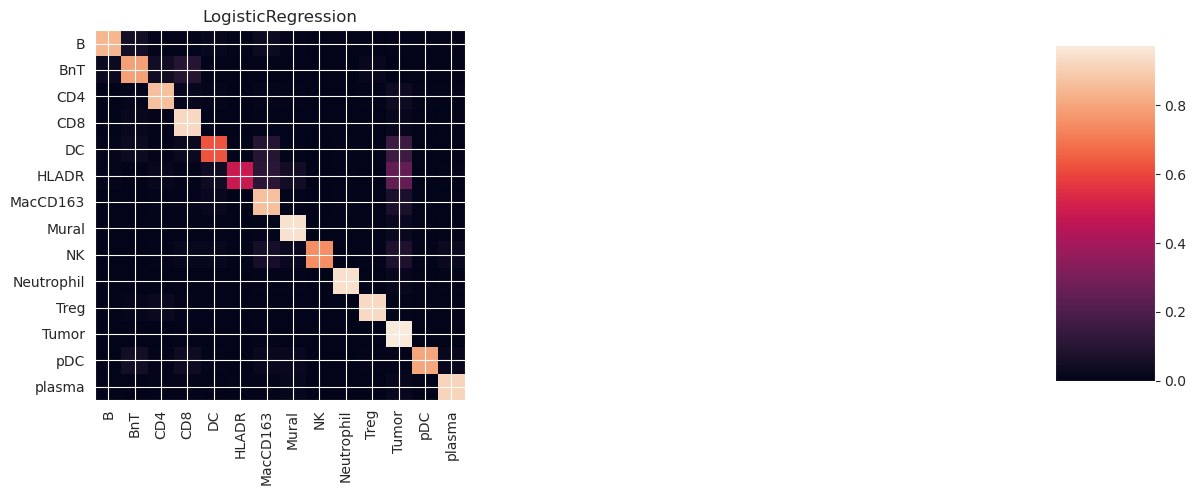

Left out column: CD163
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.56      0.46      0.50       895
       HLADR       0.75      0.39      0.51       750
    MacCD163       0.78      0.82      0.80      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.85      0.71      0.77       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.80      0.82       339
      plasma  

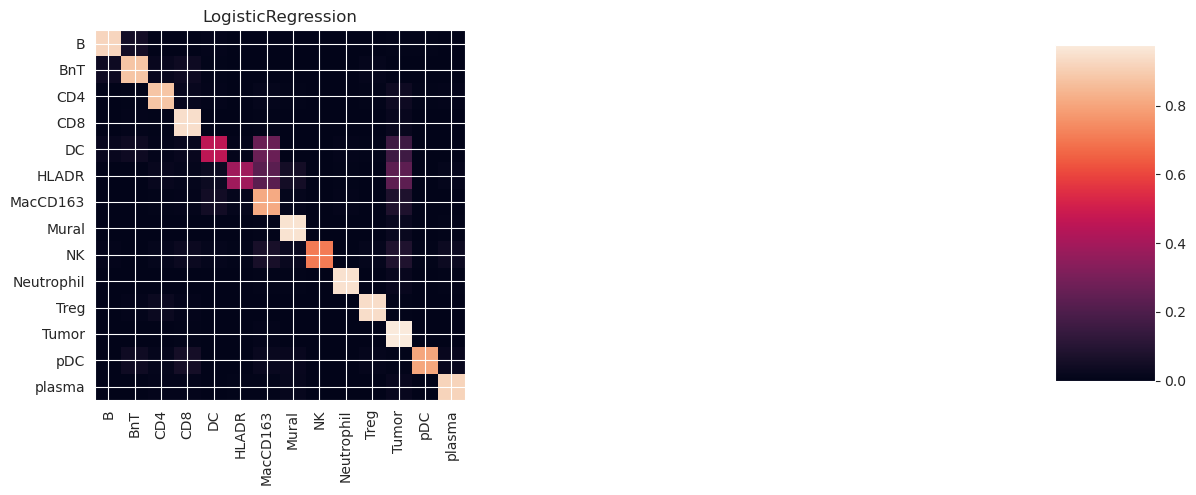

Left out column: CD7
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.91       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.68      0.61      0.64       895
       HLADR       0.81      0.50      0.62       750
    MacCD163       0.84      0.87      0.85      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.77      0.31      0.44       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.81      0.83       339
      plasma    

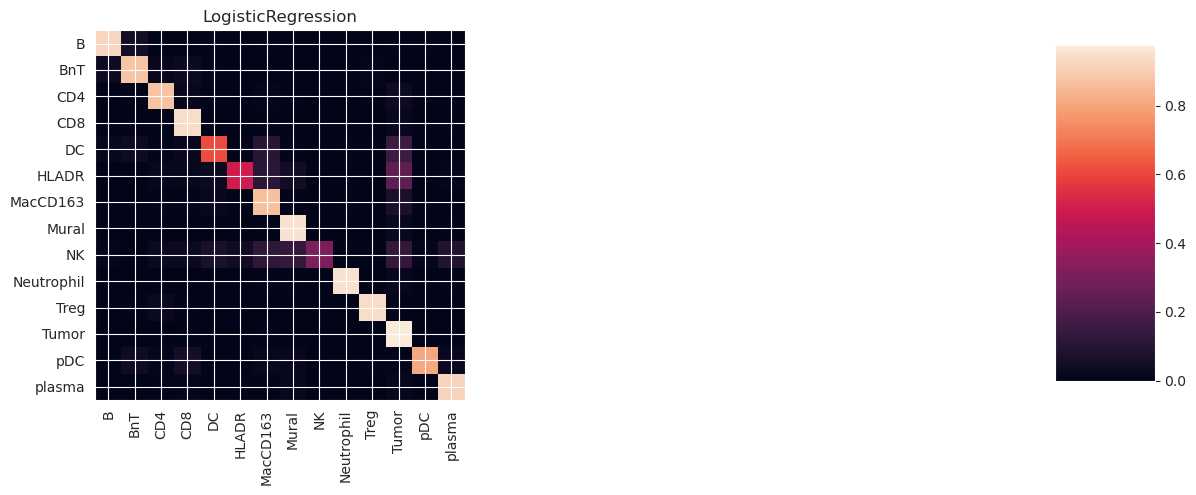

Left out column: CD45RO
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.92      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.82      0.51      0.63       750
    MacCD163       0.84      0.87      0.85      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.84      0.73      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.81      0.83       339
      plasma 

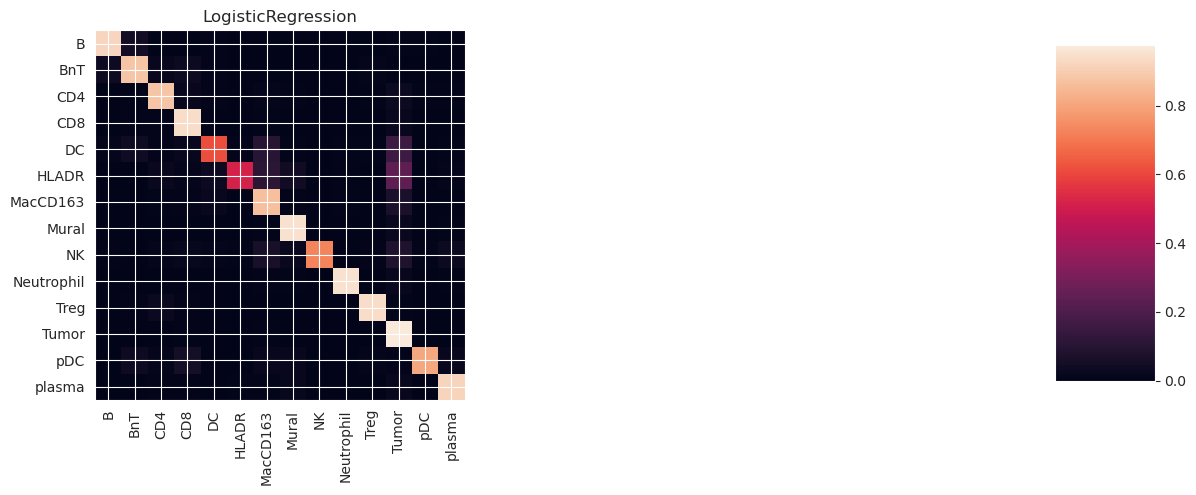

Left out column: CD4
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.92      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.87      0.88      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.80      0.50      0.61       750
    MacCD163       0.84      0.87      0.85      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.83      0.72      0.77       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.80      0.82       339
      plasma    

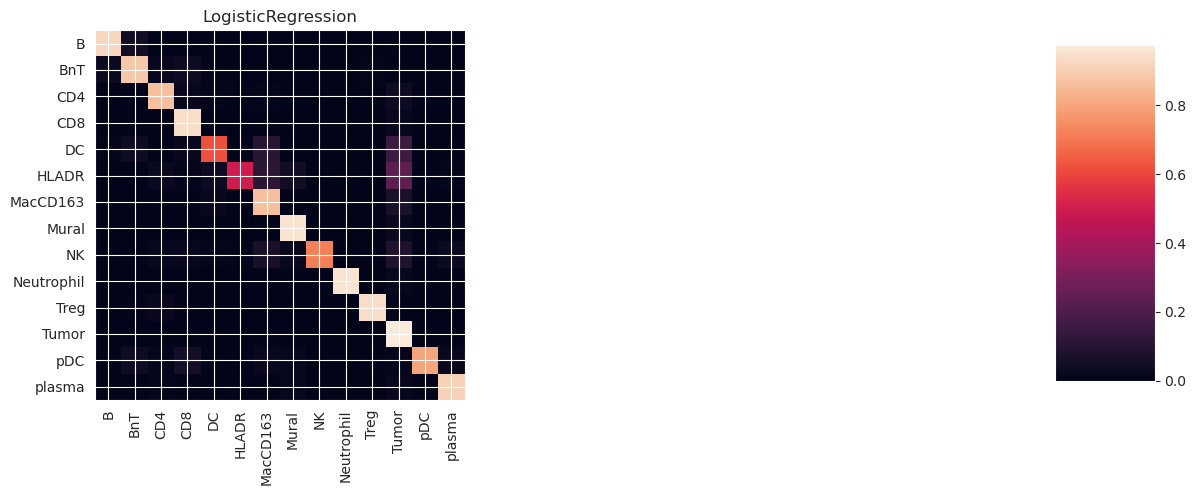

Left out column: HLADR
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.91       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.65      0.57      0.61       895
       HLADR       0.74      0.21      0.32       750
    MacCD163       0.82      0.84      0.83      3147
       Mural       0.90      0.92      0.91      4338
          NK       0.84      0.73      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.85      0.81      0.82       339
      plasma  

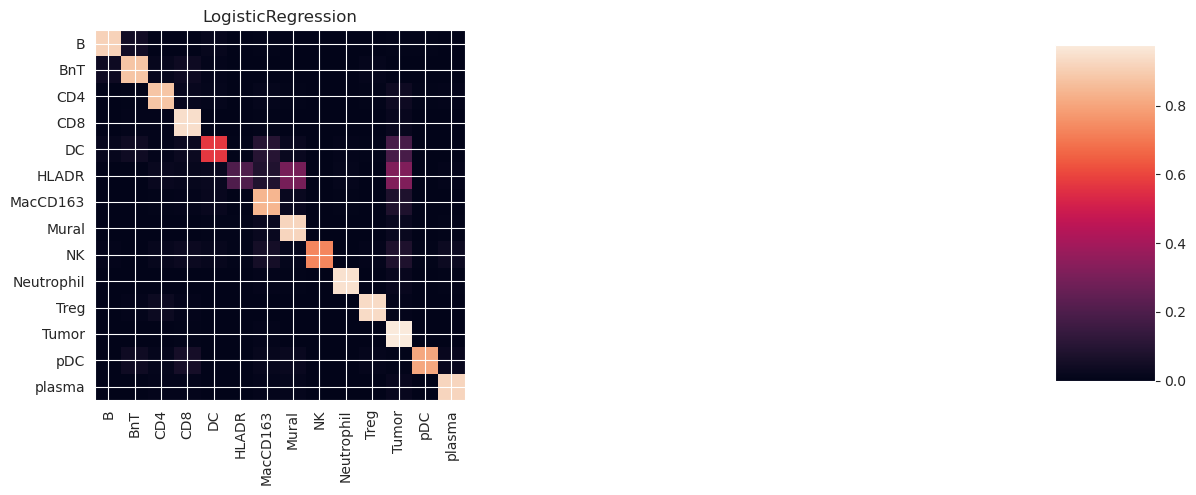

Left out column: Ecad
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.90      0.88      0.89      2525
         CD8       0.92      0.94      0.93      4204
          DC       0.66      0.61      0.63       895
       HLADR       0.75      0.42      0.54       750
    MacCD163       0.83      0.86      0.85      3147
       Mural       0.94      0.93      0.93      4338
          NK       0.81      0.66      0.73       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.95      0.97      0.96     24142
         pDC       0.83      0.78      0.80       339
      plasma   

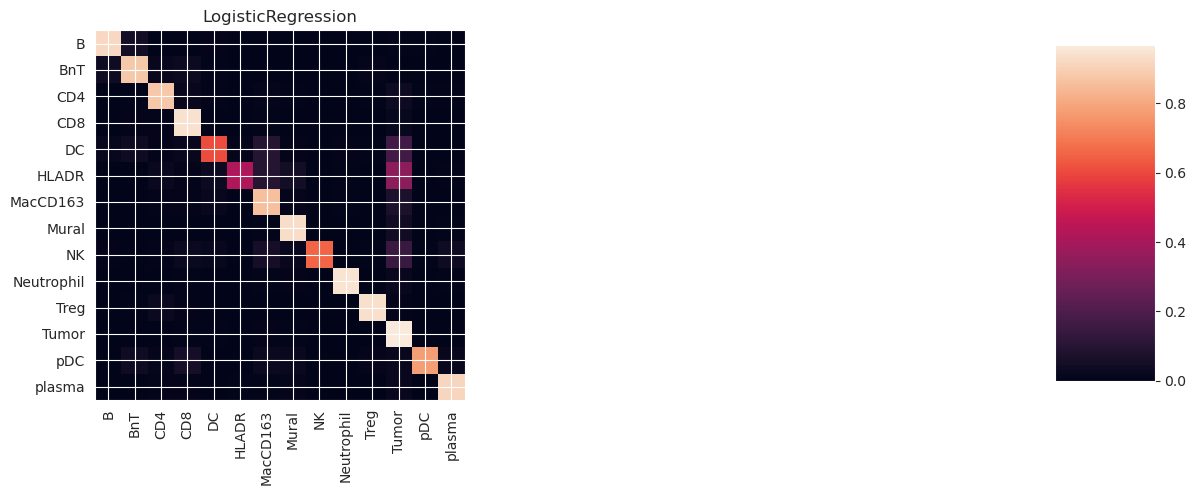

Left out column: CD8a
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.91      0.92      0.91       972
         BnT       0.88      0.89      0.88      1382
         CD4       0.75      0.72      0.74      2525
         CD8       0.83      0.83      0.83      4204
          DC       0.69      0.61      0.65       895
       HLADR       0.81      0.50      0.62       750
    MacCD163       0.84      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.85      0.74      0.79       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.95      0.95      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.82      0.83       339
      plasma   

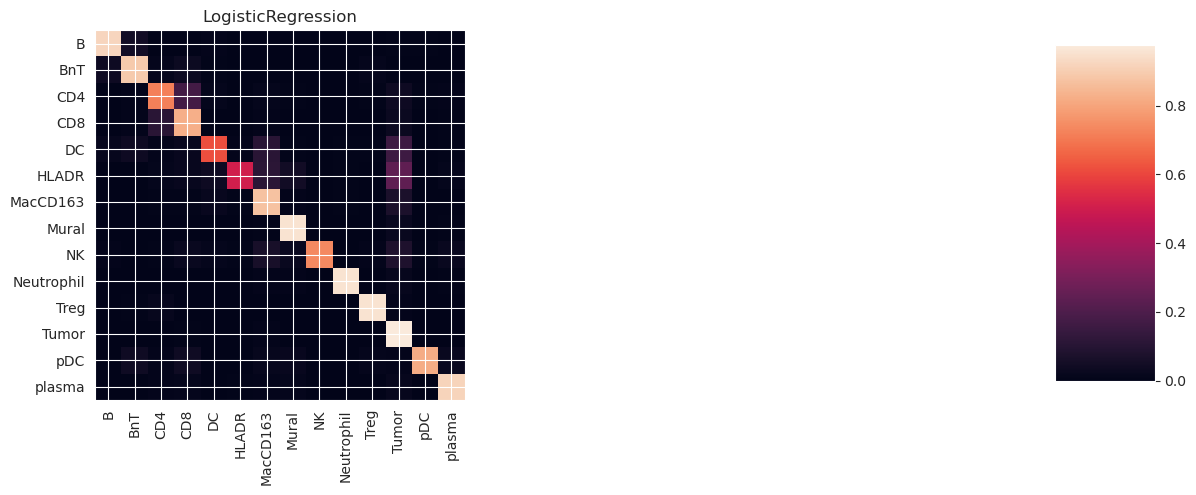

Left out column: CD3
################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4)
              precision    recall  f1-score   support

           B       0.88      0.88      0.88       972
         BnT       0.86      0.86      0.86      1382
         CD4       0.85      0.79      0.82      2525
         CD8       0.90      0.92      0.91      4204
          DC       0.67      0.59      0.63       895
       HLADR       0.83      0.49      0.61       750
    MacCD163       0.82      0.85      0.83      3147
       Mural       0.94      0.95      0.95      4338
          NK       0.79      0.67      0.72       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.87      0.80      0.83       339
      plasma    

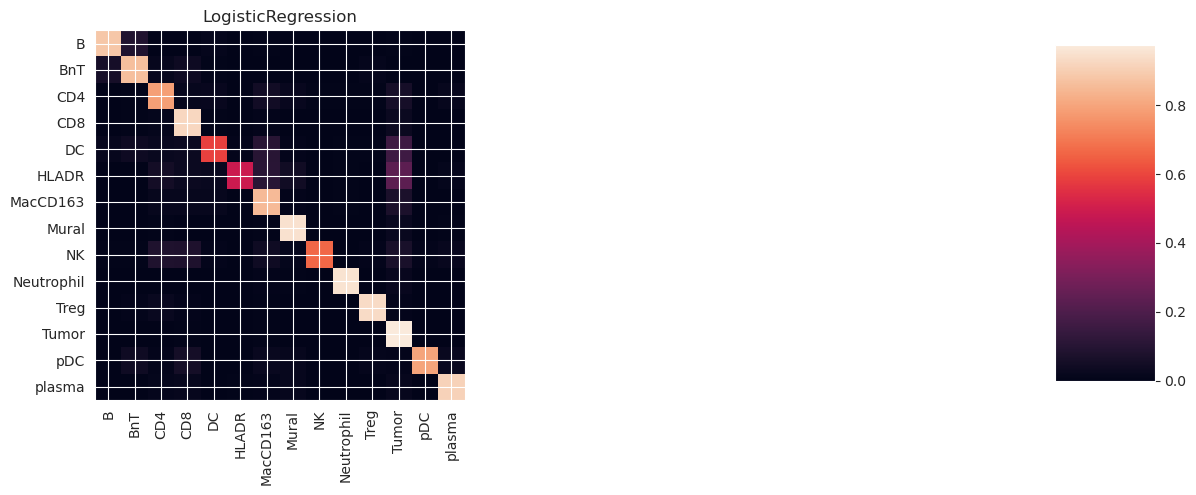

In [73]:
from matplotlib import pyplot as plt
for column in data_set.columns[indi]:
    print(f"Left out column: {column}")
    cp = data_set.copy()
    cp.drop(column, axis=1, inplace=True)
    mx, base = cv(cp, [LogisticRegression(max_iter=10000, n_jobs=4)], num_splits=1)
    ticks = train_anndata.obs['cell_labels'].astype('category').cat.categories
    fig, axs = plt.subplots(1, 1)
    for i in range(1):
        im = axs.imshow(mx[i])
        axs.set_title(f"{type(classifiers[i]).__name__}")
        axs.set_xticks(range(len(ticks)))
        axs.set_yticks(range(len(ticks)))
        axs.set_xticklabels(ticks, rotation=90)
        axs.set_yticklabels(ticks)
    
    fig.set_figwidth(20)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    
    
    plt.show()

In [82]:
cv(data_set.drop(columns=data_set.columns[indi[-5:]]), [LogisticRegression(n_jobs=3, max_iter=10000)], num_splits=1)

################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=3)
              precision    recall  f1-score   support

           B       0.84      0.86      0.85       972
         BnT       0.84      0.85      0.84      1382
         CD4       0.56      0.39      0.46      2525
         CD8       0.70      0.73      0.71      4204
          DC       0.56      0.52      0.54       895
       HLADR       0.58      0.11      0.19       750
    MacCD163       0.75      0.82      0.78      3147
       Mural       0.85      0.89      0.87      4338
          NK       0.73      0.52      0.60       234
  Neutrophil       0.94      0.95      0.94      1489
        Treg       0.93      0.94      0.94      1152
       Tumor       0.94      0.97      0.95     24142
         pDC       0.87      0.80      0.83       339
      plasma       0.90      0.91    

([array([[8.60082305e-01, 9.97942387e-02, 0.00000000e+00, 4.11522634e-03,
          1.44032922e-02, 0.00000000e+00, 3.08641975e-03, 1.02880658e-03,
          0.00000000e+00, 2.05761317e-03, 0.00000000e+00, 1.13168724e-02,
          3.08641975e-03, 1.02880658e-03],
         [8.10419682e-02, 8.48046310e-01, 7.23589001e-03, 3.18379161e-02,
          8.68306802e-03, 0.00000000e+00, 7.23589001e-04, 0.00000000e+00,
          0.00000000e+00, 1.44717800e-03, 1.37481910e-02, 4.34153401e-03,
          2.17076700e-03, 7.23589001e-04],
         [1.98019802e-03, 7.12871287e-03, 3.88514851e-01, 3.33465347e-01,
          2.73267327e-02, 1.98019802e-03, 6.61386139e-02, 4.00000000e-02,
          3.96039604e-03, 5.14851485e-03, 6.33663366e-03, 9.62376238e-02,
          3.56435644e-03, 1.82178218e-02],
         [2.14081827e-03, 9.75261656e-03, 1.16317793e-01, 7.25737393e-01,
          9.51474786e-03, 1.66508088e-03, 2.83063749e-02, 1.52235966e-02,
          2.85442436e-03, 1.66508088e-03, 4.75737393e-04,

In [84]:
# Check if additional columns are any help
cv(data_set.drop(columns=['area', 'major_axis_length', 'minor_axis_length', 'eccentricity']), classifiers, num_splits=1)

################################################################################################################################################################
LogisticRegression(max_iter=10000, n_jobs=4, verbose=False)
              precision    recall  f1-score   support

           B       0.91      0.92      0.92       972
         BnT       0.88      0.88      0.88      1382
         CD4       0.91      0.88      0.89      2525
         CD8       0.93      0.94      0.93      4204
          DC       0.69      0.62      0.65       895
       HLADR       0.82      0.51      0.63       750
    MacCD163       0.85      0.87      0.86      3147
       Mural       0.95      0.95      0.95      4338
          NK       0.83      0.74      0.78       234
  Neutrophil       0.95      0.95      0.95      1489
        Treg       0.94      0.94      0.94      1152
       Tumor       0.96      0.98      0.97     24142
         pDC       0.84      0.81      0.82       339
      plasma       0.9

([array([[9.21810700e-01, 5.04115226e-02, 0.00000000e+00, 1.02880658e-03,
          9.25925926e-03, 0.00000000e+00, 3.08641975e-03, 2.05761317e-03,
          1.02880658e-03, 1.02880658e-03, 0.00000000e+00, 5.14403292e-03,
          4.11522634e-03, 1.02880658e-03],
         [3.83502171e-02, 8.77713459e-01, 2.02604920e-02, 3.40086831e-02,
          9.40665702e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 1.30246020e-02, 1.44717800e-03,
          4.34153401e-03, 1.44717800e-03],
         [7.92079208e-04, 7.12871287e-03, 8.77227723e-01, 2.09900990e-02,
          1.10891089e-02, 3.56435644e-03, 1.30693069e-02, 7.92079208e-03,
          1.58415842e-03, 3.16831683e-03, 5.54455446e-03, 3.44554455e-02,
          3.96039604e-03, 9.50495050e-03],
         [4.75737393e-04, 8.32540438e-03, 7.84966698e-03, 9.41722169e-01,
          1.90294957e-03, 1.18934348e-03, 5.94671741e-03, 2.61655566e-03,
          9.51474786e-04, 9.51474786e-04, 7.13606089e-04,

ROC: 0.9956758275882915

Acc: 0.9342540032195205

Precision: 0.885639823271921

Recall: 0.8486143483848831

Macro F1: 0.8639084034627252